In [1]:
import pickle
import os
import numpy as np
import copy
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import json

In [2]:
state_wise_pincodes_list_dict_path = '/disk_4/grid_v21/data/dicts/misc/state_wise_pincodes_list_dict.json'

with open(state_wise_pincodes_list_dict_path, 'r') as json_file:
    state_wise_pincodes_list_dict = json.load(json_file)
    
len(state_wise_pincodes_list_dict)

33

In [3]:
state_wise_pincodes_list_dict.keys()

dict_keys(['DELHI', 'HARYANA', 'GUJARAT', 'ANDHRA_PRADESH', 'nan', 'PUNJAB', 'UTTAR_PRADESH', 'TAMIL_NADU', 'CHANDIGARH', 'HIMACHAL_PRADESH', 'KARNATAKA', 'JAMMU_AND_KASHMIR', 'RAJASTHAN', 'UTTARAKHAND', 'WEST_BENGAL', 'BIHAR', 'MAHARASHTRA', 'GOA', 'MADHYA_PRADESH', 'CHHATTISGARH', 'TELANGANA', 'ODISHA', 'PUDUCHERRY', 'KERALA', 'SIKKIM', 'ASSAM', 'ARUNACHAL_PRADESH', 'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA', 'JHARKHAND'])

In [4]:
state_wise_pincodes_list_dict['DELHI']

[110091,
 110047,
 110048,
 110055,
 110006,
 110067,
 110103,
 110086,
 110073,
 110044,
 110007,
 110124,
 110030,
 201016,
 201002,
 110025,
 110080,
 110023,
 110092,
 110106,
 110058,
 110017,
 110037,
 110083,
 201013,
 110001,
 110042,
 110117,
 110076,
 110046,
 110075,
 201303,
 110010,
 110022,
 110003,
 110020,
 201008,
 110085,
 110024,
 110034,
 110049,
 110088,
 110108,
 110004,
 201313,
 110016,
 111111,
 110041,
 110065,
 110031,
 110096,
 110093,
 110040,
 110077,
 110059,
 110066,
 110011,
 201304,
 110057,
 110054,
 110008,
 110032,
 201307,
 110064,
 110029,
 110018,
 110005,
 201009,
 110074,
 110019,
 110028,
 110089,
 110061,
 201015,
 110607,
 110081,
 110027,
 201302,
 110033,
 110118,
 110087,
 110002,
 110013,
 110115,
 110094,
 110014,
 110063,
 110045,
 110039,
 110116,
 110052,
 110021,
 110026,
 110062,
 110101,
 110097,
 110070,
 110069,
 110068,
 110090,
 110060,
 110053,
 110095,
 110078,
 110038,
 201301,
 110035,
 110072,
 110084,
 110051,
 110012,
 

In [5]:
def get_done_pincodes_all_del():
    
    save_dir_path_local = '/disk_4/grid_v21/data/dicts/new_address_share/all_deliveries_volume/'
    
    done_pincode_list_local = []
    for file in os.listdir(save_dir_path_local):
        if file.endswith('pickle'):
            pin = file.replace('_all_deliveries_volume.pickle', '')
            done_pincode_list_local.append(pin)
            
    print('len(done_pincode_list_local) ', len(done_pincode_list_local))
    return done_pincode_list_local
          

def load_count_dict_all_del(pincode_local):
    save_dir_path_local = '/disk_4/grid_v21/data/dicts/new_address_share/all_deliveries_volume/'
    save_pincode_path_local = save_dir_path_local+str(pincode_local)+'_all_deliveries_volume.pickle'
    with open(save_pincode_path_local, 'rb') as fp:
        dict_local = pickle.load(fp)
        
    return dict_local

In [6]:

def get_done_pincodes_all_del():
    
    save_dir_path_local = '/disk_4/grid_v21/data/dicts/new_address_share/all_deliveries_volume/'
    
    done_pincode_list_local = []
    for file in os.listdir(save_dir_path_local):
        if file.endswith('pickle'):
            pin = file.replace('_all_deliveries_volume.pickle', '')
            done_pincode_list_local.append(pin)
            
    print('len(done_pincode_list_local) ', len(done_pincode_list_local))
    return done_pincode_list_local
          

def load_count_dict_all_del(pincode_local):
    save_dir_path_local = '/disk_4/grid_v21/data/dicts/new_address_share/all_deliveries_volume/'
    save_pincode_path_local = save_dir_path_local+str(pincode_local)+'_all_deliveries_volume.pickle'
    with open(save_pincode_path_local, 'rb') as fp:
        dict_local = pickle.load(fp)
        
    return dict_local



done_pincode_list_all_del = get_done_pincodes_all_del()


completed_states = ['DELHI', 'HARYANA', 'GUJARAT', 'ANDHRA PRADESH', 'nan', 'PUNJAB', 
                    'UTTAR PRADESH', 'TAMIL NADU', 'CHANDIGARH', 'HIMACHAL PRADESH', 'KARNATAKA', 
                    'JAMMU AND KASHMIR', 'RAJASTHAN', 'UTTARAKHAND', 'WEST BENGAL', 'BIHAR', 
                    'MAHARASHTRA', 'GOA', 'MADHYA PRADESH', 'CHHATTISGARH', 'TELANGANA', 'ODISHA', 'PUDUCHERRY',
                    'KERALA', 'SIKKIM', 'ASSAM', 'ARUNACHAL PRADESH', 'MEGHALAYA',
                    'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA', 'JHARKHAND']


pincode_wise_count_dict_all_del = {}
for state_to_do, state_wise_pincodes_list in state_wise_pincodes_list_dict.items():
    print('\n starting now ',state_to_do)

    for pincode in state_wise_pincodes_list:
        if str(pincode) in done_pincode_list_all_del:
            pin_dict = load_count_dict_all_del(pincode)

            pincode_wise_count_dict_all_del[pincode] = pin_dict




len(done_pincode_list_local)  15209

 starting now  DELHI

 starting now  HARYANA

 starting now  GUJARAT

 starting now  ANDHRA_PRADESH

 starting now  nan

 starting now  PUNJAB

 starting now  UTTAR_PRADESH

 starting now  TAMIL_NADU

 starting now  CHANDIGARH

 starting now  HIMACHAL_PRADESH

 starting now  KARNATAKA

 starting now  JAMMU_AND_KASHMIR

 starting now  RAJASTHAN

 starting now  UTTARAKHAND

 starting now  WEST_BENGAL

 starting now  BIHAR

 starting now  MAHARASHTRA

 starting now  GOA

 starting now  MADHYA_PRADESH

 starting now  CHHATTISGARH

 starting now  TELANGANA

 starting now  ODISHA

 starting now  PUDUCHERRY

 starting now  KERALA

 starting now  SIKKIM

 starting now  ASSAM

 starting now  ARUNACHAL_PRADESH

 starting now  MEGHALAYA

 starting now  MANIPUR

 starting now  MIZORAM

 starting now  NAGALAND

 starting now  TRIPURA

 starting now  JHARKHAND


In [7]:
# YEAR_RANGE_LIST = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
YEAR_RANGE_LIST = [2021,2022]

def count_total_for_a_pincode(pin_wise_dict_local):
    total_local = 0
    for k,v in pin_wise_dict_local.items():
        if k[0] in YEAR_RANGE_LIST:
            if k != (2022, 7) :
                total_local += v
    return total_local
    

def get_total_count_pincode_wise(pincode_wise_count_dict_local):
    total_count_pincode_wise_dict_local = {}
    for pin in pincode_wise_count_dict_local:
        total_count_pincode_wise_dict_local[pin] = count_total_for_a_pincode(pincode_wise_count_dict_local[pin])
    
    return total_count_pincode_wise_dict_local




order_wise_count_pincode_wise_dict = get_total_count_pincode_wise(pincode_wise_count_dict_all_del)
print(len(order_wise_count_pincode_wise_dict))

15209


In [8]:

len(order_wise_count_pincode_wise_dict.keys())

15209

In [9]:

len(order_wise_count_pincode_wise_dict)

15209

In [10]:
proportional_load_share_merged_df.head()

NameError: name 'proportional_load_share_merged_df' is not defined

In [ ]:
len(proportional_load_share_merged_df)

NameError: name 'proportional_load_share_merged_df' is not defined

In [ ]:
duplicate_pincodes = df_mapping[df_mapping.duplicated('Pincode', keep=False)]
print(f"Number of duplicate pincodes in df_mapping: {len(duplicate_pincodes)}")
print(duplicate_pincodes)


NameError: name 'df_mapping' is not defined

In [11]:
pincodes_in_mapping_not_in_orders = df_mapping[~df_mapping['Pincode'].isin(order_wise_count_pincode_wise_dict.keys())]
print(f"Number of pincodes in df_mapping but not in order_wise_count_pincode_wise_dict: {len(pincodes_in_mapping_not_in_orders)}")
print(pincodes_in_mapping_not_in_orders)


NameError: name 'df_mapping' is not defined

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')


total_orders = sum(order_wise_count_pincode_wise_dict.values()) ## find the total orders

print(total_orders)


proportional_weight_pincode_wise_dict = {pin: orders/total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()} 

#print("Proportional Weight Pincode-wise Dict:")
#print(proportional_weight_pincode_wise_dict)


proportional_load_share_df = pd.DataFrame(list(proportional_weight_pincode_wise_dict.items()), columns=['Pincode', 'Proportional_Load_Share'])

proportional_load_share_df['Pincode'] = proportional_load_share_df['Pincode'].astype(str)
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)


proportional_load_share_merged_df = proportional_load_share_df.merge(df_mapping, on='Pincode', how='left')

#print("Merged DataFrame with Load Share and Additional Details:")
#print(proportional_load_share_merged_df.head())


state_load_share = proportional_load_share_merged_df.groupby('State')['Proportional_Load_Share'].sum()

print("State-wise Load Share:")
print(state_load_share)

plt.figure(figsize=(14, 7))
state_load_share.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Proportional Load Share')
plt.title('State-wise Proportional Load Share - Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

833303834
State-wise Load Share:
State
ANDHRA PRADESH       0.048104
ARUNACHAL PRADESH    0.001725
ASSAM                0.031623
BIHAR                0.062007
CHANDIGARH           0.001121
CHHATTISGARH         0.009122
DELHI                0.050088
GOA                  0.006460
GUJARAT              0.039605
HARYANA              0.029986
HIMACHAL PRADESH     0.005374
JAMMU AND KASHMIR    0.003132
JHARKHAND            0.024748
KARNATAKA            0.083466
KERALA               0.062401
MADHYA PRADESH       0.027124
MAHARASHTRA          0.089574
MANIPUR              0.001335
MEGHALAYA            0.002307
MIZORAM              0.000996
NAGALAND             0.001583
ODISHA               0.042810
PUDUCHERRY           0.001291
PUNJAB               0.019477
RAJASTHAN            0.027627
SIKKIM               0.001563
TAMIL NADU           0.073301
TELANGANA            0.042732
TRIPURA              0.004642
UTTAR PRADESH        0.094878
UTTARAKHAND          0.010134
WEST BENGAL          0.097935
N

In [12]:
len(proportional_load_share_merged_df)

15209

833303834
State-wise Load Share:
State
ANDHRA PRADESH       40085497
ARUNACHAL PRADESH     1437257
ASSAM                26351450
BIHAR                51670428
CHANDIGARH             934289
CHHATTISGARH          7601786
DELHI                41738164
GOA                   5383284
GUJARAT              33003370
HARYANA              24987787
HIMACHAL PRADESH      4477937
JAMMU AND KASHMIR     2609801
JHARKHAND            20622927
KARNATAKA            69552349
KERALA               51998585
MADHYA PRADESH       22602469
MAHARASHTRA          74642315
MANIPUR               1112816
MEGHALAYA             1922579
MIZORAM                830200
NAGALAND              1318942
ODISHA               35674134
PUDUCHERRY            1075667
PUNJAB               16230665
RAJASTHAN            23021365
SIKKIM                1302414
TAMIL NADU           61082150
TELANGANA            35609104
TRIPURA               3868199
UTTAR PRADESH        79062529
UTTARAKHAND           8444467
WEST BENGAL          81609742
N

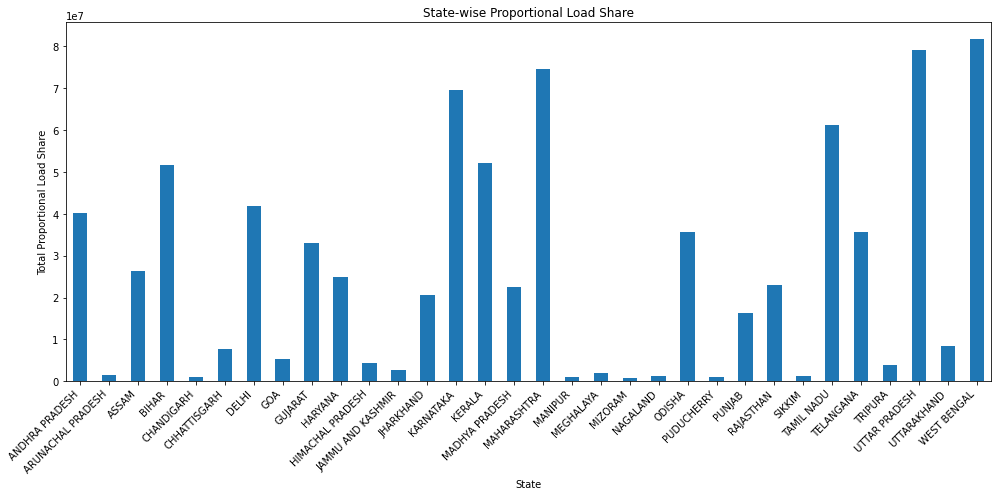

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')


total_orders = sum(order_wise_count_pincode_wise_dict.values())

print(total_orders)


proportional_weight_pincode_wise_dict = {pin: orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

#print("Proportional Weight Pincode-wise Dict:")
#print(proportional_weight_pincode_wise_dict)


proportional_load_share_df = pd.DataFrame(list(proportional_weight_pincode_wise_dict.items()), columns=['Pincode', 'Proportional_Load_Share'])

proportional_load_share_df['Pincode'] = proportional_load_share_df['Pincode'].astype(str)
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)


proportional_load_share_merged_df = proportional_load_share_df.merge(df_mapping, on='Pincode', how='left')

#print("Merged DataFrame with Load Share and Additional Details:")
#print(proportional_load_share_merged_df.head())


state_load_share = proportional_load_share_merged_df.groupby('State')['Proportional_Load_Share'].sum()

print("State-wise Load Share:")
print(state_load_share)

plt.figure(figsize=(14, 7))
state_load_share.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Proportional Load Share')
plt.title('State-wise Proportional Load Share')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
import geopandas as gpd

india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape"  # Update with the correct path

# Read India shapefile
gdf_india = gpd.read_file(india_shapefile_path)
gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()

# Print list of state names
state_names = gdf_india['State_Name'].unique().tolist()
print("Available state names for masking:")
print(state_names)


Available state names for masking:
['ANDAMAN & NICOBAR', 'CHANDIGARH', 'DAMAN AND DIU AND DADRA AND NAGAR HAVELI', 'DELHI', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'ODISHA', 'PUDUCHERRY', 'TAMILNADU', 'CHHATTISHGARH', 'TELENGANA', 'ANDHRA PRADESH', 'GOA', 'HIMACHAL PRADESH', 'PUNJAB', 'RAJASTHAN', 'GUJARAT', 'UTTARAKHAND', 'UTTAR PRADESH', 'SIKKIM', 'ASSAM', 'ARUNACHAL PRADESH', 'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'WEST BENGAL', 'BIHAR', 'LADAKH', 'JAMMU AND KASHMIR']


Total Orders: 833303834
Available state names for masking:
['ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISHGARH', 'DAMAN AND DIU AND DADRA AND NAGAR HAVELI', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LADAKH', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMILNADU', 'TELENGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']


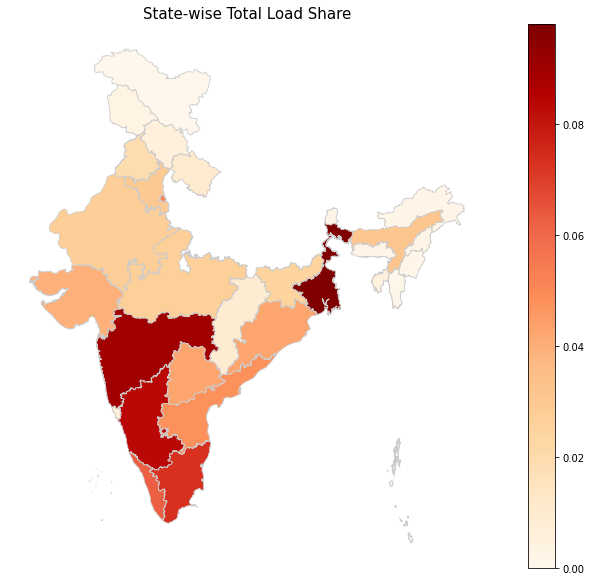

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape" 

# Read and process mapping data
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# Calculate total orders
total_orders = sum(order_wise_count_pincode_wise_dict.values())
print(f"Total Orders: {total_orders}")

# Create proportional load share DataFrame
proportional_weight_pincode_wise_dict = {pin: orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
proportional_load_share_df = pd.DataFrame(list(proportional_weight_pincode_wise_dict.items()), columns=['Pincode', 'Proportional_Load_Share'])
proportional_load_share_df['Pincode'] = proportional_load_share_df['Pincode'].astype(str)

# Merge proportional load share with mapping data
proportional_load_share_merged_df = proportional_load_share_df.merge(df_mapping, on='Pincode', how='left')

# Calculate state load share
state_load_share = proportional_load_share_merged_df.groupby('State')['Proportional_Load_Share'].sum()
state_load_share.index = state_load_share.index.str.upper()
state_load_share = state_load_share.rename(index={'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH', 'TELANGANA': 'TELENGANA'})

# Read India shapefile
gdf_india = gpd.read_file(india_shapefile_path)
gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()

# Merge shapefile with state load share
gdf_merged = gdf_india.set_index('State_Name').join(state_load_share, how='left')
gdf_merged['Proportional_Load_Share'] = gdf_merged['Proportional_Load_Share'].fillna(0)

# Print list of state names
print("Available state names for masking:")
print(gdf_merged.index.unique().tolist())

# Define states to mask (Example: replace with actual state names you want to exclude)
states_to_mask = ['UTTAR PRADESH' , 'BIHAR']  # Replace with actual state names

# Filter out states to be masked
gdf_merged = gdf_merged[~gdf_merged.index.isin(states_to_mask)]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(column='Proportional_Load_Share', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State-wise Total Load Share', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')
plt.show()


Total Orders: 833303834


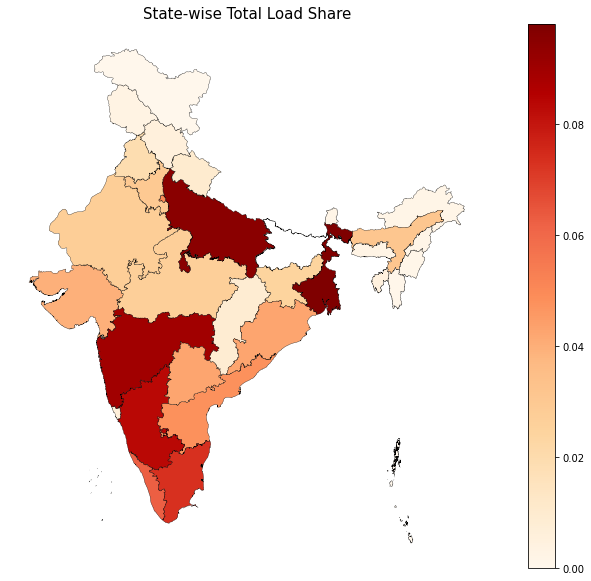

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape"  

df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
print(f"Total Orders: {total_orders}")

proportional_weight_pincode_wise_dict = {pin: orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
proportional_load_share_df = pd.DataFrame(list(proportional_weight_pincode_wise_dict.items()), columns=['Pincode', 'Proportional_Load_Share'])
proportional_load_share_df['Pincode'] = proportional_load_share_df['Pincode'].astype(str)
proportional_load_share_merged_df = proportional_load_share_df.merge(df_mapping, on='Pincode', how='left')
state_load_share = proportional_load_share_merged_df.groupby('State')['Proportional_Load_Share'].sum()
state_load_share.index = state_load_share.index.str.upper()
state_load_share = state_load_share.rename(index={'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH', 'TELANGANA': 'TELENGANA'})
gdf_india = gpd.read_file(india_shapefile_path)
gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
gdf_merged = gdf_india.set_index('State_Name').join(state_load_share, how='left')
gdf_merged['Proportional_Load_Share'] = gdf_merged['Proportional_Load_Share'].fillna(0)
states_to_mask = ['BIHAR'] 
gdf_masked = gdf_merged[gdf_merged.index.isin(states_to_mask)]
gdf_merged = gdf_merged[~gdf_merged.index.isin(states_to_mask)]
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_masked.plot(ax=ax, color='white',linewidth=0.5,  edgecolor='black')
gdf_merged.plot(column='Proportional_Load_Share', cmap='OrRd', linewidth=0.3, ax=ax, edgecolor='black', legend=True)
ax.set_title('State-wise Total Load Share', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')
plt.show()


In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

total_orders = sum(order_wise_count_pincode_wise_dict.values())
print(f"Total Orders: {total_orders}")

proportional_weight_pincode_wise_dict = {pin: orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

proportional_load_share_df = pd.DataFrame(list(proportional_weight_pincode_wise_dict.items()), columns=['Pincode', 'Proportional_Load_Share'])
proportional_load_share_df['Pincode'] = proportional_load_share_df['Pincode'].astype(str)
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

proportional_load_share_merged_df = proportional_load_share_df.merge(df_mapping, on='Pincode', how='left')

state_load_share = proportional_load_share_merged_df.groupby('State')['Proportional_Load_Share'].sum()

state_load_share.index = state_load_share.index.str.upper()
state_load_share = state_load_share.rename(index={'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH' , 'TELANGANA' : 'TELENGANA' , })

india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape"  # Update with the correct path
gdf_india = gpd.read_file(india_shapefile_path)

gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()

gdf_merged = gdf_india.set_index('State_Name').join(state_load_share, how='left')

gdf_merged['Proportional_Load_Share'] = gdf_merged['Proportional_Load_Share'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(column='Proportional_Load_Share', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State-wise Total Load Share', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')
plt.show()


Total Orders: 833303834


In [17]:
india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape/India_State_Boundary.shp"  # Update with the correct path
gdf_india = gpd.read_file(india_shapefile_path)

# Inspect the columns of the shapefile to find the state name column
print(gdf_india.columns)

Index(['State_Name', 'geometry'], dtype='object')


In [18]:
gdf_india.State_Name

0                            Andaman & Nicobar
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                        Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                   Tamilnadu
14                               Chhattishgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

In [19]:
sum(proportional_weight_pincode_wise_dict.values())

833303834

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)
order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)
state_wise_load_share = df_mapping.groupby('State')['Order_Count'].sum()
print("State-wise Load Share:")
print(state_wise_load_share)
plt.figure(figsize=(16, 8))
state_wise_load_share.plot(kind='bar', color='tab:blue', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Total Order Count')
plt.title('State-wise Absolute Load Share')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



State-wise Load Share:
State
ANDAMAN AND NICOBAR ISLANDS           0.0
ANDHRA PRADESH                 40085497.0
ARUNACHAL PRADESH               1437257.0
ASSAM                          26351450.0
BIHAR                          51670428.0
CHANDIGARH                       934289.0
CHHATTISGARH                    7601786.0
DELHI                          41738164.0
GOA                             5383284.0
GUJARAT                        33003370.0
HARYANA                        24987787.0
HIMACHAL PRADESH                4477937.0
JAMMU AND KASHMIR               2609801.0
JHARKHAND                      20622927.0
KARNATAKA                      69552349.0
KERALA                         51998585.0
LADAKH                                0.0
MADHYA PRADESH                 22602469.0
MAHARASHTRA                    74642315.0
MANIPUR                         1112816.0
MEGHALAYA                       1922579.0
MIZORAM                          830200.0
NAGALAND                        1318942.0
ODISH

In [21]:
total_orders = sum(order_wise_count_pincode_wise_dict.values())

In [22]:
total_orders

833303834

In [23]:
def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local

In [24]:
def load_acc_dict_deb_9(acc_file_path_local):
    with open(acc_file_path_local, 'rb') as fp:
        acc_dict = pickle.load(fp)

        
    acc_dict_int = {}
    
    for k,v in acc_dict.items():
        acc_dict_int[int(k)] = v
    
    return acc_dict_int

pin_start_dig_list = ['1', '2', '3', '4', '5', '6', '7', '8']

phase_1_group_wise_acc_dict= {}
for pin_start_dig in pin_start_dig_list:
    acc_path = '/disk_4/grid_v21/data/dicts/misc/acc_grid_v2/test_acc_dict_grp_'+pin_start_dig+'.json'
    
    acc_dict = load_acc_dict_deb_9(acc_path)
    
    phase_1_group_wise_acc_dict[pin_start_dig] = acc_dict


phase_1_pin_wise_acc_dict_loaded = {}
for k,v in phase_1_group_wise_acc_dict.items():
    phase_1_pin_wise_acc_dict_loaded.update(v)

print(len(phase_1_pin_wise_acc_dict_loaded))

phase_1_pin_wise_acc_dict = {}

for k,v in phase_1_pin_wise_acc_dict_loaded.items():
    phase_1_pin_wise_acc_dict[str(k)] = v

2144


In [25]:
def load_acc(acc_path_local):
    with open(acc_path_local, 'rb') as fp:
        acc_dict_local = pickle.load(fp)
    return acc_dict_local


def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local


    
def get_all_pin_acc_dict(state_wise_pin_acc_dict_local):
    all_pin_wise_acc_dict_local = {}
    
    for state in state_wise_pin_acc_dict_local:
        for pin, pin_acc in state_wise_pin_acc_dict_local[state].items():
            all_pin_wise_acc_dict_local[pin] = pin_acc
            
            
    all_pin_wise_acc_dict_local_2 = {}
    for k,v in all_pin_wise_acc_dict_local.items():
        all_pin_wise_acc_dict_local_2[str(k)] = v
    
    
    print('len of all_pin_wise_acc_dict_local ', len(all_pin_wise_acc_dict_local_2))
    return all_pin_wise_acc_dict_local_2


state_to_do_list = ['PUDUCHERRY', 'JHARKHAND', 'SIKKIM', 'TRIPURA', 'HIMACHAL_PRADESH', 'MADHYA_PRADESH', 'ODISHA', 
                    'WEST_BENGAL', 'TAMIL_NADU', 'JAMMU_AND_KASHMIR', 'UTTARAKHAND', 'CHHATTISGARH', 'HARYANA', 
                    'ARUNACHAL_PRADESH', 'MEGHALAYA', 'PUNJAB', 'NAGALAND', 'MIZORAM', 'MAHARASHTRA', 'KARNATAKA',
                    'KERALA', 'CHANDIGARH', 'GUJARAT', 'RAJASTHAN', 'GOA', 'ASSAM', 'ANDHRA_PRADESH', 'BIHAR', 
                    'UTTAR_PRADESH', 'TELANGANA', 'MANIPUR']
state_wise_pin_acc_dict = {}
for state_to_do in state_to_do_list:
    state_acc_dir = '/disk_4/grid_v21/data/dicts/misc/dh_acc_dicts/dh_acc_dicts_L1/state_grp_'+state_to_do+'/'

    print('\n state ', state_to_do)
    dh_pin_wise_acc_dict, pin_wise_acc_dict = get_acc_dicts_for_state(state_acc_dir)
    
    state_wise_pin_acc_dict[state_to_do] = pin_wise_acc_dict
    
    
    
phase_II_pin_wise_acc_dict = get_all_pin_acc_dict(state_wise_pin_acc_dict)


 state  PUDUCHERRY
len of dh_wise_acc 2 and len of pin_wise_acc 22 

 state  JHARKHAND
len of dh_wise_acc 45 and len of pin_wise_acc 193 

 state  SIKKIM
len of dh_wise_acc 6 and len of pin_wise_acc 8 

 state  TRIPURA
len of dh_wise_acc 18 and len of pin_wise_acc 48 

 state  HIMACHAL_PRADESH
len of dh_wise_acc 11 and len of pin_wise_acc 68 

 state  MADHYA_PRADESH
len of dh_wise_acc 53 and len of pin_wise_acc 189 

 state  ODISHA
len of dh_wise_acc 77 and len of pin_wise_acc 393 

 state  WEST_BENGAL
len of dh_wise_acc 161 and len of pin_wise_acc 877 

 state  TAMIL_NADU
len of dh_wise_acc 109 and len of pin_wise_acc 1009 

 state  JAMMU_AND_KASHMIR
len of dh_wise_acc 6 and len of pin_wise_acc 33 

 state  UTTARAKHAND
len of dh_wise_acc 14 and len of pin_wise_acc 47 

 state  CHHATTISGARH
len of dh_wise_acc 22 and len of pin_wise_acc 106 

 state  HARYANA
len of dh_wise_acc 37 and len of pin_wise_acc 185 

 state  ARUNACHAL_PRADESH
len of dh_wise_acc 6 and len of pin_wise_acc 7 

 s

In [26]:
better_btw_p_I_II = {}
all_pin_p1_vs_p2 = {}

for k,v in phase_1_pin_wise_acc_dict.items():
    if k in phase_II_pin_wise_acc_dict:
        p_I_acc = v['per'][500]
        p_II_acc = phase_II_pin_wise_acc_dict[k]['per'][500]
        
        
        if p_II_acc > p_I_acc + 0.01:
            better_btw_p_I_II[k] = "p2"
            all_pin_p1_vs_p2[k]  = "p2"
#             print(p_II_acc, p_I_acc)
        else:
            better_btw_p_I_II[k] = "p1"
            all_pin_p1_vs_p2[k]  = "p1"
            
            
            
    else:
        all_pin_p1_vs_p2[k]  = "p1"
        
for k,v in phase_II_pin_wise_acc_dict.items():
    if k not in all_pin_p1_vs_p2:
        all_pin_p1_vs_p2[k]  = "p2"
        
            
print('len(better_btw_p_I_II, len(all_pin_p1_vs_p2)) ', len(better_btw_p_I_II), len(all_pin_p1_vs_p2))

## merge p I & p II dicts
updated_phase_I_II_pin_wise_acc_dict = {}
only_phase_2_additional_pin_wise_acc_dict = {}
only_phase_1_additional_pin_wise_acc_dict = {}

for pin in all_pin_p1_vs_p2:
    if all_pin_p1_vs_p2[pin] == 'p1':
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
    else:
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]
        
            
for pin in phase_II_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p2':
        only_phase_2_additional_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]

        
for pin in phase_1_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p1':
        only_phase_1_additional_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
  
        
print(len(updated_phase_I_II_pin_wise_acc_dict), len(only_phase_2_additional_pin_wise_acc_dict), len(only_phase_1_additional_pin_wise_acc_dict))

len(better_btw_p_I_II, len(all_pin_p1_vs_p2))  279 10684
10684 8600 2084


In [27]:
updated_phase_I_II_pin_wise_acc_dict

{'122018': {'num': {100: 4399,
   200: 5183,
   500: 5841,
   1000: 5983,
   2000: 6021,
   'rest': 84,
   'None': 0},
  'per': {100: 0.7205569205569206,
   200: 0.848976248976249,
   500: 0.9567567567567568,
   1000: 0.98001638001638,
   2000: 0.9862407862407863,
   'rest': 0.013759213759213759,
   'None': 0.0}},
 '123413': {'num': {100: 37,
   200: 46,
   500: 48,
   1000: 48,
   2000: 50,
   'rest': 0,
   'None': 0},
  'per': {100: 0.74,
   200: 0.92,
   500: 0.96,
   1000: 0.96,
   2000: 1.0,
   'rest': 0.0,
   'None': 0.0}},
 '122016': {'num': {100: 2844,
   200: 3069,
   500: 3253,
   1000: 3307,
   2000: 3329,
   'rest': 71,
   'None': 0},
  'per': {100: 0.8364705882352941,
   200: 0.9026470588235294,
   500: 0.956764705882353,
   1000: 0.9726470588235294,
   2000: 0.9791176470588235,
   'rest': 0.02088235294117647,
   'None': 0.0}},
 '122413': {'num': {100: 1700,
   200: 2013,
   500: 2321,
   1000: 2421,
   2000: 2470,
   'rest': 61,
   'None': 0},
  'per': {100: 0.67167127617

In [28]:
def load_pickle_file(path_local):
    with open(path_local, 'rb') as handle:
        loaded_file = pickle.load(handle)
        
    return loaded_file

In [29]:
google_acc_dict_dir = '/disk_5/paper/flip_methods/google/google_drift_acc/'

pincode_wise_acc_dict_google = {}

for file in tqdm(os.listdir(google_acc_dict_dir)):

    pincode = file.replace('_google_acc_dict.pickle', '')
    acc_path = os.path.join(google_acc_dict_dir, file)

    acc_dict = load_pickle_file(acc_path)

    pincode_wise_acc_dict_google[pincode] = acc_dict
    
#     if len(pincode_wise_acc_dict) == 2:
#         break


print(len(pincode_wise_acc_dict_google))

100%|██████████| 10665/10665 [00:00<00:00, 54583.28it/s]

10665


In [30]:
pincode_wise_acc_dict_google

{'847234': {'num': {100: 78,
   200: 111,
   500: 215,
   1000: 286,
   2000: 452,
   'rest': 231,
   'None': 0},
  'per': {100: 0.11420204978038068,
   200: 0.16251830161054173,
   500: 0.31478770131771594,
   1000: 0.41874084919472915,
   2000: 0.6617862371888726,
   'rest': 0.33821376281112736,
   'None': 0.0}},
 '571478': {'num': {100: 4,
   200: 10,
   500: 14,
   1000: 18,
   2000: 23,
   'rest': 21,
   'None': 0},
  'per': {100: 0.09090909090909091,
   200: 0.22727272727272727,
   500: 0.3181818181818182,
   1000: 0.4090909090909091,
   2000: 0.5227272727272727,
   'rest': 0.4772727272727273,
   'None': 0.0}},
 '403001': {'num': {100: 1749,
   200: 2113,
   500: 2619,
   1000: 3041,
   2000: 3390,
   'rest': 172,
   'None': 1},
  'per': {100: 0.4910162829870859,
   200: 0.5932060640089837,
   500: 0.7352610892756878,
   1000: 0.8537338573834924,
   2000: 0.9517125210555868,
   'rest': 0.04828747894441325,
   'None': 0.00028074115665356543}},
 '734015': {'num': {100: 82,
   200: 

In [31]:
def overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list):
    overall_performance = {'metric': [], 'model_1_total': [], 'model_2_total': []}
    for metric in updated_phase_I_II_pin_wise_acc_dict[common_pincode_list[0]]['per']:
        if metric not in ['rest', 'None']:
            total_model_1 = sum(updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] for pin in common_pincode_list)
            total_model_2 = sum(pincode_wise_acc_dict_google[pin]['per'][metric] for pin in common_pincode_list)
            overall_performance['metric'].append(metric)
            overall_performance['model_1_total'].append(total_model_1 / len(common_pincode_list))
            overall_performance['model_2_total'].append(total_model_2 / len(common_pincode_list))
    return overall_performance

common_pincode_list = list(set(updated_phase_I_II_pin_wise_acc_dict.keys()) & set(pincode_wise_acc_dict_google.keys())) 

overall_performance = overall_performance_comparison(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list)
df_overall_performance = pd.DataFrame(overall_performance)
print(df_overall_performance.head())

plt.figure(figsize=(12, 6))
plt.plot(df_overall_performance['metric'], df_overall_performance['model_1_total'], label='GRID', marker='o')
plt.plot(df_overall_performance['metric'], df_overall_performance['model_2_total'], label='Google', marker='x')
plt.xlabel('Evaluation Metric')
plt.ylabel('Average Accuracy')
plt.legend()
plt.title('Overall Performance Comparison')
plt.grid(True)
plt.show()

   metric  model_1_total  model_2_total
0     100       0.548677       0.185700
1     200       0.674203       0.289035
2     500       0.792095       0.467967
3    1000       0.850092       0.606272
4    2000       0.887324       0.726642


In [32]:
for metric in updated_phase_I_II_pin_wise_acc_dict[common_pincode_list[0]]['per']:
    print(metric)
len(common_pincode_list)    

100
200
500
1000
2000
rest
None


10665

In [33]:
def overall_performance_comparison_weighted(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, proportional_weight_pincode_wise_dict):
    overall_performance = {'metric': [], 'model_1_total': [], 'model_2_total': []}
    for metric in updated_phase_I_II_pin_wise_acc_dict[common_pincode_list[0]]['per']:
        if metric not in ['rest', 'None']:
            total_model_1 = 0
            total_model_2 = 0
            valid_pincodes = 0
            for pin in common_pincode_list:
                pin_int = int(pin)  
                if pin_int in proportional_weight_pincode_wise_dict:
                    total_model_1 += updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] * proportional_weight_pincode_wise_dict[pin_int]
                    total_model_2 += pincode_wise_acc_dict_google[pin]['per'][metric] * proportional_weight_pincode_wise_dict[pin_int]
                    valid_pincodes += 1
                else:
                    print(f"Pincode {pin} not found in proportional weight dictionary")
            overall_performance['metric'].append(metric)
            overall_performance['model_1_total'].append(total_model_1)
            overall_performance['model_2_total'].append(total_model_2)
    return overall_performance

common_pincode_list = list(set(updated_phase_I_II_pin_wise_acc_dict.keys()) & set(pincode_wise_acc_dict_google.keys()))

overall_performance_weighted = overall_performance_comparison_weighted(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list, proportional_weight_pincode_wise_dict)
df_overall_performance_weighted = pd.DataFrame(overall_performance_weighted)
print(df_overall_performance_weighted.head())

# Plot overall performance considering load share
plt.figure(figsize=(12, 6))
plt.plot(df_overall_performance_weighted['metric'], df_overall_performance_weighted['model_1_total'], label='GRID (Weighted)', marker='o')
plt.plot(df_overall_performance_weighted['metric'], df_overall_performance_weighted['model_2_total'], label='Google (Weighted)', marker='x')
plt.xlabel('Evaluation Metric')
plt.ylabel('Weighted Average Accuracy')
plt.legend()
plt.title('Overall Performance Comparison (Weighted)')
plt.grid(True)
plt.show()


Pincode 180001 not found in proportional weight dictionary
Pincode 500012 not found in proportional weight dictionary
Pincode 180001 not found in proportional weight dictionary
Pincode 500012 not found in proportional weight dictionary
Pincode 180001 not found in proportional weight dictionary
Pincode 500012 not found in proportional weight dictionary
Pincode 180001 not found in proportional weight dictionary
Pincode 500012 not found in proportional weight dictionary
Pincode 180001 not found in proportional weight dictionary
Pincode 500012 not found in proportional weight dictionary
   metric  model_1_total  model_2_total
0     100   4.935338e+08   1.899621e+08
1     200   5.940152e+08   2.843016e+08
2     500   6.692828e+08   4.286387e+08
3    1000   7.004444e+08   5.298018e+08
4    2000   7.197268e+08   6.107443e+08


In [34]:
proportional_weight_pincode_wise_dict.keys()

dict_keys([110091, 110047, 110048, 110055, 110006, 110067, 110103, 110086, 110073, 110044, 110007, 110124, 201016, 201002, 110025, 110080, 110023, 110092, 110106, 110058, 110017, 110037, 110083, 201013, 110001, 110042, 110117, 110076, 110046, 110075, 201303, 110010, 110022, 110003, 110020, 201008, 110085, 110024, 110034, 110049, 110088, 110108, 110004, 201313, 110016, 111111, 110041, 110065, 110031, 110096, 110093, 110040, 110077, 110059, 110066, 110011, 201304, 110057, 110054, 110008, 110032, 201307, 110064, 110029, 110018, 110005, 201009, 110074, 110019, 110028, 110089, 110061, 201015, 110607, 110081, 110027, 201302, 110033, 110118, 110087, 110002, 110013, 110115, 110094, 110014, 110063, 110045, 110039, 110116, 110052, 110021, 110026, 110062, 110101, 110097, 110070, 110069, 110068, 110090, 110060, 110053, 110095, 110078, 110038, 201301, 110035, 110072, 110084, 110051, 110012, 110043, 110082, 110050, 110009, 110056, 110015, 110071, 110036, 122103, 127027, 132040, 124412, 136130, 12504

In [35]:
proportional_weight_pincode_wise_dict[110091]

619826

In [36]:
sum(proportional_weight_pincode_wise_dict.values())

833303834

In [37]:
common_pincode_list[:5]

['613704', '848505', '680518', '673108', '591344']

In [38]:
# def plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list):
#     metrics = [100, 200, 500, 1000, 2000, 'rest', 'None']
#     for metric in metrics:
#         if metric not in ['rest', 'None']:
#             model_1_acc = [updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] for pin in common_pincode_list]
#             model_2_acc = [pincode_wise_acc_dict_google[pin]['per'][metric] for pin in common_pincode_list]
#             plt.figure(figsize=(12, 6))
#             plt.hist(model_1_acc, bins=50, alpha=0.5, label='GRID')
#             plt.hist(model_2_acc, bins=50, alpha=0.5, label='Google')
#             plt.xlabel('Accuracy')
#             plt.ylabel('Frequency')
#             plt.legend()
#             plt.title(f'Accuracy Distribution for Metric {metric}')
#             plt.grid(True)
#             plt.show()
    
#     return model_1_acc , model_2_acc
# grid , google = plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list)


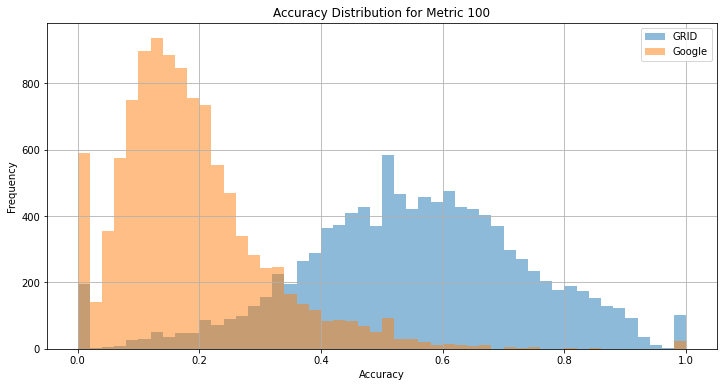

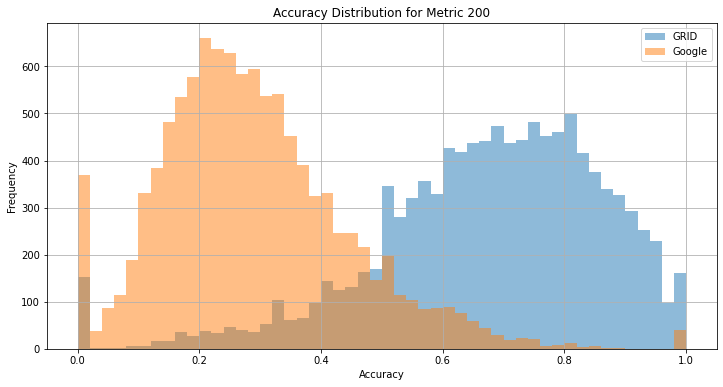

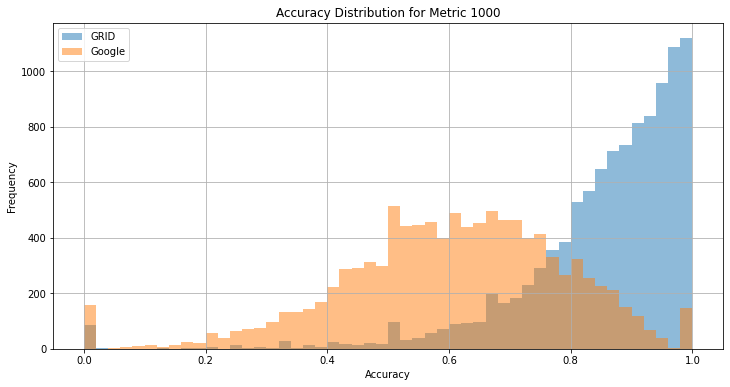

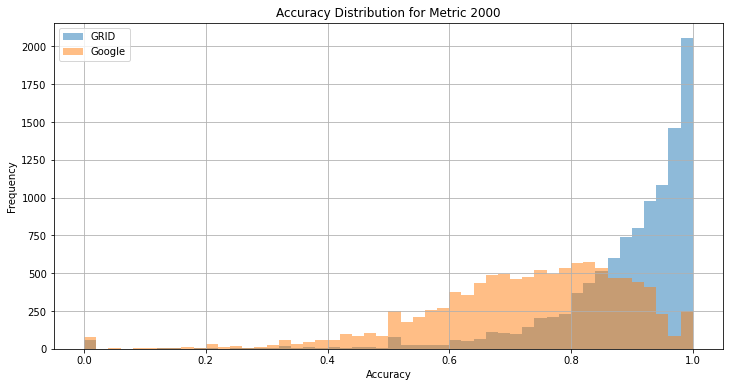

   Metric Pincode          State     Load_Share    Model
0     100  160060     CHANDIGARH   216658996840  Model 1
1     100  689114         KERALA   243324719528  Model 1
2     100  686032         KERALA  1036629969496  Model 1
3     100  273307  UTTAR PRADESH  1461614924836  Model 1
4     100  686568         KERALA   257490884706  Model 1


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list):
    metrics = [100, 200, 500, 1000, 2000]
    zero_accuracy_details = {'Metric': [], 'Pincode': [], 'State': [], 'Load_Share': [], 'Model': []}
    
    for metric in metrics:
        model_1_acc = [updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] for pin in common_pincode_list]
        model_2_acc = [pincode_wise_acc_dict_google[pin]['per'][metric] for pin in common_pincode_list]
        
        zero_acc_model_1 = [pin for pin in common_pincode_list if updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] == 0]
        zero_acc_model_2 = [pin for pin in common_pincode_list if pincode_wise_acc_dict_google[pin]['per'][metric] == 0]

        for pin in zero_acc_model_1:
            zero_accuracy_details['Metric'].append(metric)
            zero_accuracy_details['Pincode'].append(pin)
            zero_accuracy_details['State'].append(df_mapping[df_mapping['Pincode'] == pin]['State'].values[0])
            zero_accuracy_details['Load_Share'].append(proportional_weight_pincode_wise_dict[int(pin)]*total_orders)
            zero_accuracy_details['Model'].append('Model 1')
        
        for pin in zero_acc_model_2:
            zero_accuracy_details['Metric'].append(metric)
            zero_accuracy_details['Pincode'].append(pin)
            zero_accuracy_details['State'].append(df_mapping[df_mapping['Pincode'] == pin]['State'].values[0])
            zero_accuracy_details['Load_Share'].append(proportional_weight_pincode_wise_dict[int(pin)]*total_orders)
            zero_accuracy_details['Model'].append('Google MMI')
        
        plt.figure(figsize=(12, 6))
        plt.hist(model_1_acc, bins=50, alpha=0.5, label='GRID')
        plt.hist(model_2_acc, bins=50, alpha=0.5, label='Google')
        plt.xlabel('Accuracy')
        plt.ylabel('Frequency')
        plt.legend()
        plt.title(f'Accuracy Distribution for Metric {metric}')
        plt.grid(True)
        plt.show()
    
    zero_accuracy_df = pd.DataFrame(zero_accuracy_details)
    return zero_accuracy_df

zero_accuracy_df = plot_accuracy_distribution(updated_phase_I_II_pin_wise_acc_dict, pincode_wise_acc_dict_google, common_pincode_list)

print(zero_accuracy_df.head())


Total Number of Pincodes for Each State:
State
ANDAMAN AND NICOBAR ISLANDS       1
ANDHRA PRADESH                  813
ARUNACHAL PRADESH                17
ASSAM                           510
BIHAR                           781
CHANDIGARH                       47
CHHATTISGARH                    214
DELHI                           119
GOA                             110
GUJARAT                         755
HARYANA                         304
HIMACHAL PRADESH                194
JAMMU AND KASHMIR                98
JHARKHAND                       327
KARNATAKA                      1012
KERALA                         1757
LADAKH                            3
MADHYA PRADESH                  531
MAHARASHTRA                    1299
MANIPUR                          24
MEGHALAYA                        26
MIZORAM                          17
NAGALAND                          9
ODISHA                          786
PUDUCHERRY                       22
PUNJAB                          425
RAJASTHAN        

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


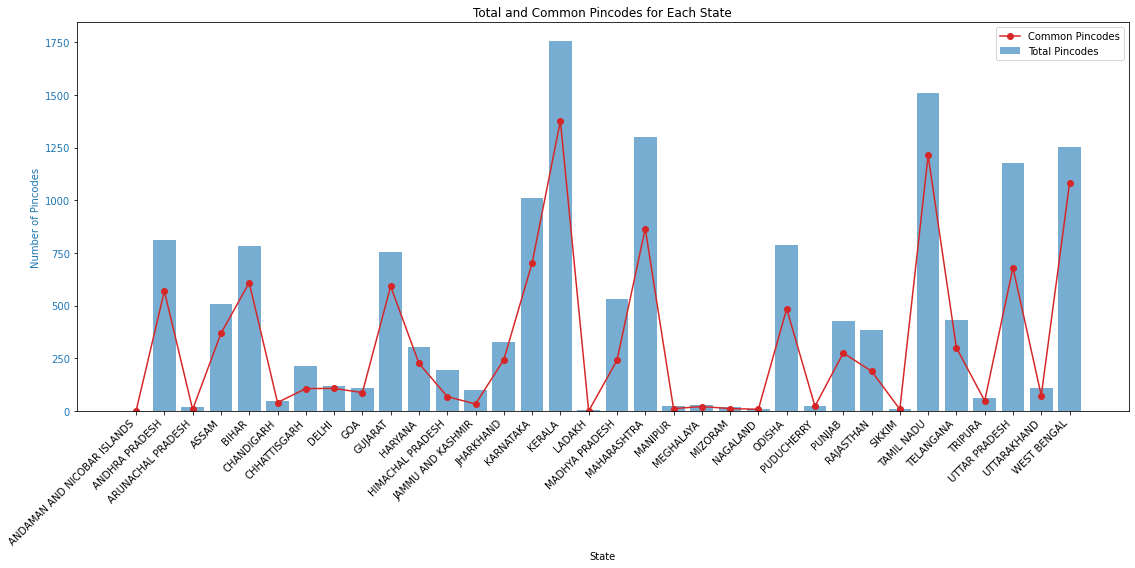

In [40]:

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# Calculate total number of pincodes for each state
state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
print("Total Number of Pincodes for Each State:")
print(state_pincode_counts)

# Calculate number of common pincodes for each state
common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
print("Number of Common Pincodes for Each State:")
print(state_common_pincode_counts)

# Create a DataFrame for the counts
df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

# Calculate totals
total_pincodes = df_counts['Total_Pincodes'].sum()
total_common_pincodes = df_counts['Common_Pincodes'].sum()

print(f"Total number of pincodes: {total_pincodes}")
print(f"Total number of common pincodes: {total_common_pincodes}")

# Plot the data
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Pincodes', color=color)
ax1.bar(df_counts.index, df_counts['Total_Pincodes'], color=color, alpha=0.6, label='Total Pincodes')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_counts.index, rotation=45, ha='right')

ax1.plot(df_counts.index, df_counts['Common_Pincodes'], color='tab:red', marker='o', label='Common Pincodes')
ax1.legend(loc='upper right')
ax1.set_title('Total and Common Pincodes for Each State')

fig.tight_layout()
plt.show()


In [41]:
# pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
# df_mapping = pd.read_csv(pin_dh_mapping_path)
# df_mapping = df_mapping.drop_duplicates(subset='Pincode')
# df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
# print("Total Number of Pincodes for Each State:")
# print(state_pincode_counts)

# common_pincode_set = set(common_pincode_list)
# df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
# state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
# print("Number of Common Pincodes for Each State:")
# print(state_common_pincode_counts)

# df_counts = pd.DataFrame({
#     'Total_Pincodes': state_pincode_counts,
#     'Common_Pincodes': state_common_pincode_counts
# }).fillna(0)

# fig, ax1 = plt.subplots(figsize=(16, 8))

# color = 'tab:blue'
# ax1.set_xlabel('State')
# ax1.set_ylabel('Number of Pincodes', color=color)
# ax1.bar(df_counts.index, df_counts['Total_Pincodes'], color=color, alpha=0.6, label='Total Pincodes')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticklabels(df_counts.index, rotation=45, ha='right')

# ax1.plot(df_counts.index, df_counts['Common_Pincodes'], color='tab:red', marker='o', label='Common Pincodes')
# ax1.legend(loc='upper right')
# ax1.set_title('Total and Common Pincodes for Each State')

# fig.tight_layout()
# plt.show()


In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the pincode_dh_mapping dataframe
# pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
# df_mapping = pd.read_csv(pin_dh_mapping_path)


# # Ensure Pincode columns are strings
# df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# # Add absolute load share (order counts) to df_mapping
# order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
# df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)

# # Calculate total load share for each state
# state_total_load_share = df_mapping.groupby('State')['Order_Count'].sum()
# print("Total Load Share for Each State:")
# print(state_total_load_share)

# # Identify the common pincodes and calculate load share for common pincodes
# common_pincode_set = set(common_pincode_list)
# df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
# state_common_load_share = df_mapping[df_mapping['Is_Common']].groupby('State')['Order_Count'].sum()
# print("Load Share for Common Pincodes for Each State:")
# print(state_common_load_share)

# # Combine both load shares into a single dataframe
# df_load_shares = pd.DataFrame({
#     'Total_Load_Share': state_total_load_share,
#     'Common_Load_Share': state_common_load_share
# }).fillna(0)

# # Plot total load share and load share covered in common list
# fig, ax1 = plt.subplots(figsize=(16, 8))

# # Plot total load share as bars
# color = 'tab:blue'
# ax1.set_xlabel('State')
# ax1.set_ylabel('Total Load Share', color=color)
# ax1.bar(df_load_shares.index, df_load_shares['Total_Load_Share'], color=color, alpha=0.6, label='Total Load Share')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticklabels(df_load_shares.index, rotation=45, ha='right')

# # Plot load share covered in common list as line with markers
# ax1.plot(df_load_shares.index, df_load_shares['Common_Load_Share'], color='tab:red', marker='o', label='Common Load Share')
# ax1.legend(loc='upper right')
# ax1.set_title('Total and Common Load Share for Each State')

# fig.tight_layout()
# plt.show()


In [43]:
756422480/833303834

0.9077391092382757

In [44]:
total_orders

833303834

Total Load Share for Each State:
State
ANDAMAN AND NICOBAR ISLANDS           0.0
ANDHRA PRADESH                 40085497.0
ARUNACHAL PRADESH               1437257.0
ASSAM                          26351450.0
BIHAR                          51670428.0
CHANDIGARH                       934289.0
CHHATTISGARH                    7601786.0
DELHI                          41738164.0
GOA                             5383284.0
GUJARAT                        33003370.0
HARYANA                        24987787.0
HIMACHAL PRADESH                4477937.0
JAMMU AND KASHMIR               2609801.0
JHARKHAND                      20622927.0
KARNATAKA                      69552349.0
KERALA                         51998585.0
LADAKH                                0.0
MADHYA PRADESH                 22602469.0
MAHARASHTRA                    74642315.0
MANIPUR                         1112816.0
MEGHALAYA                       1922579.0
MIZORAM                          830200.0
NAGALAND                        13189

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator


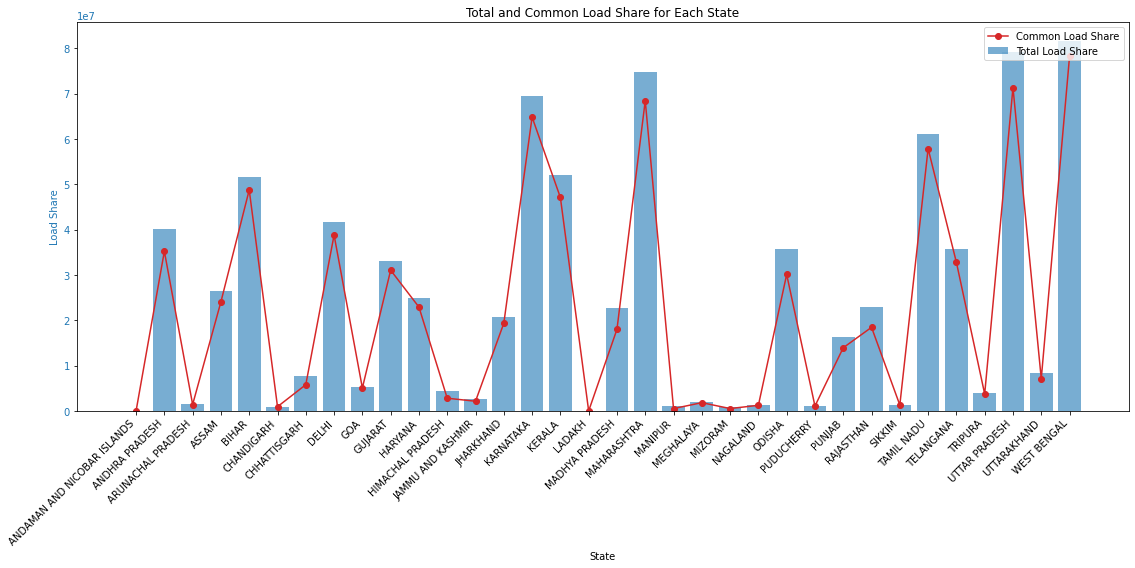

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pincode_dh_mapping dataframe
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')


# Ensure Pincode columns are strings
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# Add absolute load share (order counts) to df_mapping
order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)

# Calculate total load share for each state
state_total_load_share = df_mapping.groupby('State')['Order_Count'].sum()
print("Total Load Share for Each State:")
print(state_total_load_share)

# Identify the common pincodes and calculate load share for common pincodes
common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_load_share = df_mapping[df_mapping['Is_Common']].groupby('State')['Order_Count'].sum()
print("Load Share for Common Pincodes for Each State:")
print(state_common_load_share)

# Combine both load shares into a single dataframe
df_load_shares = pd.DataFrame({
    'Total_Load_Share': state_total_load_share,
    'Common_Load_Share': state_common_load_share
}).fillna(0)

# Calculate the total load share and common total load share
total_load_share = df_load_shares['Total_Load_Share'].sum()
common_total_load_share = df_load_shares['Common_Load_Share'].sum()

print(f"Total Load Share: {total_load_share}")
print(f"Common Total Load Share: {common_total_load_share}")

# Plot total load share and load share covered in common list
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot total load share as bars
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Load Share', color=color)
ax1.bar(df_load_shares.index, df_load_shares['Total_Load_Share'], color=color, alpha=0.6, label='Total Load Share')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_load_shares.index, rotation=45, ha='right')

# Plot load share covered in common list as line with markers
ax1.plot(df_load_shares.index, df_load_shares['Common_Load_Share'], color='tab:red', marker='o', label='Common Load Share')
ax1.legend(loc='upper right')
ax1.set_title('Total and Common Load Share for Each State')

fig.tight_layout()
plt.show()


Metric: 100m
Total Load Share: (0.0007475340621077714, 622923.0)
State-wise Load Share:
State
ANDHRA PRADESH    1.008036e-06
CHANDIGARH        4.092145e-07
CHHATTISGARH      5.022178e-05
DELHI             1.171241e-06
GUJARAT           1.676939e-05
HARYANA           5.102581e-06
JHARKHAND         1.514694e-05
KARNATAKA         1.505093e-05
KERALA            3.279824e-04
MADHYA PRADESH    1.260045e-05
MAHARASHTRA       3.557646e-05
MEGHALAYA         3.655329e-06
ODISHA            1.236416e-04
PUNJAB            1.952589e-05
RAJASTHAN         1.822865e-06
TAMIL NADU        3.916579e-05
TELANGANA         2.899543e-05
UTTAR PRADESH     3.288836e-05
UTTARAKHAND       5.456593e-06
WEST BENGAL       1.134280e-05
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH       840.0
CHANDIGARH           341.0
CHHATTISGARH       41850.0
DELHI                976.0
GUJARAT            13974.0
HARYANA             4252.0
JHARKHAND          12622.0
KARNATAKA          12542.0
KERALA            

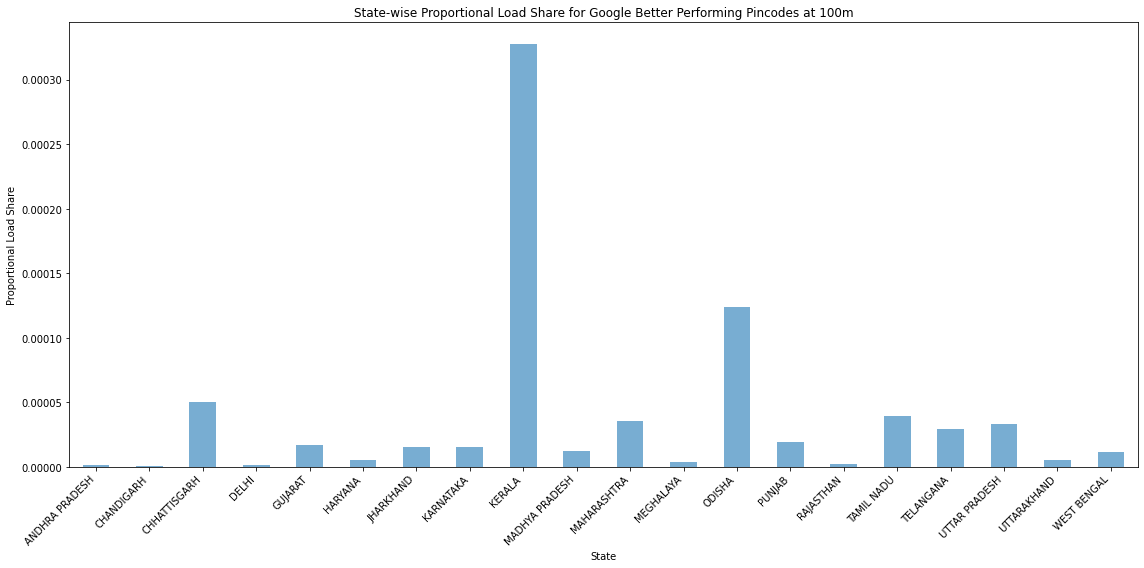

Metric: 200m
Total Load Share: (0.0007881651004140227, 656781.0000000001)
State-wise Load Share:
State
ANDHRA PRADESH      1.636138e-05
ASSAM               1.109919e-05
BIHAR               5.454193e-06
CHANDIGARH          3.120110e-07
CHHATTISGARH        1.961469e-05
DELHI               1.171241e-06
GUJARAT             2.771138e-05
HARYANA             5.102581e-06
HIMACHAL PRADESH    1.450851e-06
KARNATAKA           1.582856e-05
KERALA              3.255991e-04
MADHYA PRADESH      1.260045e-05
MAHARASHTRA         5.499315e-05
ODISHA              1.320539e-04
PUNJAB              2.294001e-05
RAJASTHAN           1.939269e-06
TAMIL NADU          3.900498e-05
TELANGANA           4.492599e-05
TRIPURA             2.527529e-05
UTTAR PRADESH       6.595433e-06
UTTARAKHAND         6.030213e-06
WEST BENGAL         1.210123e-05
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH       13634.0
ASSAM                 9249.0
BIHAR                 4545.0
CHANDIGARH             260.0
CHH

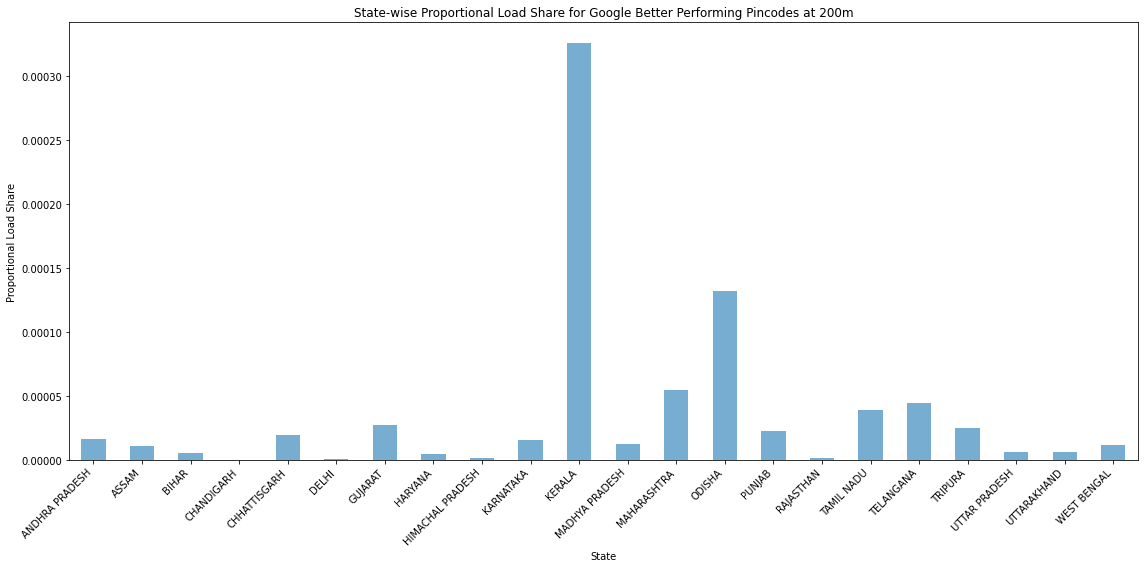

Metric: 500m
Total Load Share: (0.001944911248302259, 1620701.9999999984)
State-wise Load Share:
State
ANDHRA PRADESH      0.000083
ASSAM               0.000032
BIHAR               0.000047
CHANDIGARH          0.000001
CHHATTISGARH        0.000053
DELHI               0.000002
GUJARAT             0.000132
HARYANA             0.000068
HIMACHAL PRADESH    0.000019
KARNATAKA           0.000075
KERALA              0.000573
MADHYA PRADESH      0.000022
MAHARASHTRA         0.000131
MEGHALAYA           0.000012
ODISHA              0.000154
PUNJAB              0.000078
RAJASTHAN           0.000016
TAMIL NADU          0.000109
TELANGANA           0.000095
TRIPURA             0.000029
UTTAR PRADESH       0.000127
UTTARAKHAND         0.000007
WEST BENGAL         0.000079
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH       69440.0
ASSAM                26844.0
BIHAR                39565.0
CHANDIGARH             880.0
CHHATTISGARH         44563.0
DELHI                 1377.0
GUJA

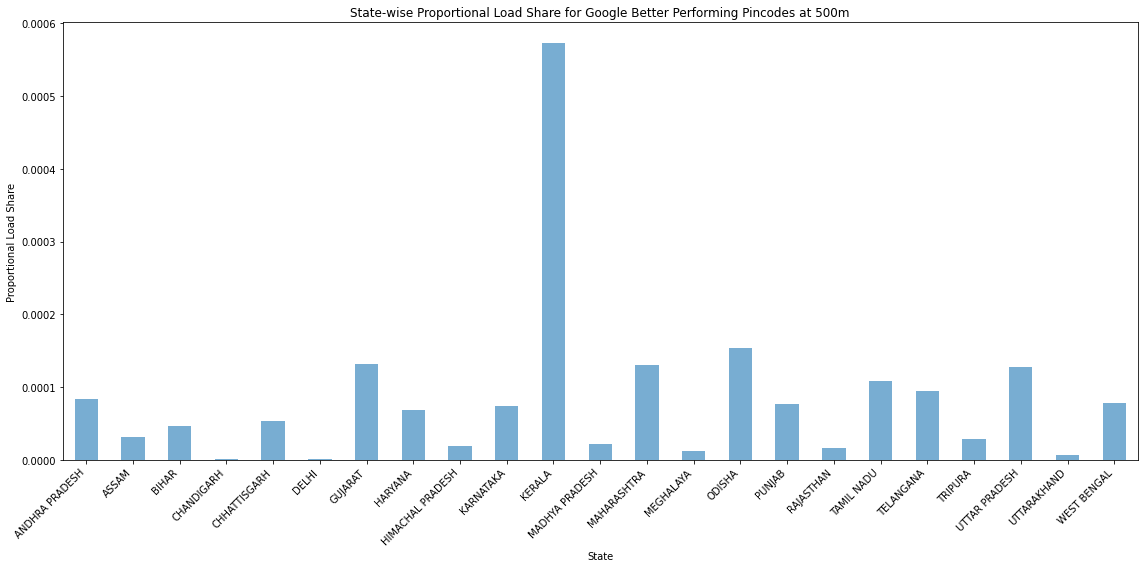

Metric: 1000m
Total Load Share: (0.004620576364706851, 3850344.0000000014)
State-wise Load Share:
State
ANDHRA PRADESH      2.516861e-04
ASSAM               4.401036e-05
BIHAR               7.055170e-05
CHANDIGARH          9.264328e-07
CHHATTISGARH        5.615359e-05
DELHI               1.652458e-06
GOA                 7.193055e-06
GUJARAT             2.753365e-04
HARYANA             2.185757e-04
HIMACHAL PRADESH    2.551050e-05
JHARKHAND           2.822980e-05
KARNATAKA           2.552358e-04
KERALA              1.423992e-03
MADHYA PRADESH      1.077998e-04
MAHARASHTRA         3.048048e-04
MANIPUR             2.045112e-05
ODISHA              1.699452e-04
PUNJAB              1.376965e-04
RAJASTHAN           4.782409e-05
TAMIL NADU          3.513976e-04
TELANGANA           2.256008e-04
TRIPURA             5.120461e-05
UTTAR PRADESH       2.409433e-04
UTTARAKHAND         7.101851e-06
WEST BENGAL         2.967525e-04
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH     

Metric: 2000m
Total Load Share: (0.01115885781463956, 9298719.000000007)
State-wise Load Share:
State
ANDHRA PRADESH      0.000559
ASSAM               0.000426
BIHAR               0.000205
CHANDIGARH          0.000004
CHHATTISGARH        0.000088
DELHI               0.000002
GOA                 0.000017
GUJARAT             0.000698
HARYANA             0.000500
HIMACHAL PRADESH    0.000034
JHARKHAND           0.000085
KARNATAKA           0.000549
KERALA              0.004038
MADHYA PRADESH      0.000128
MAHARASHTRA         0.000563
MANIPUR             0.000020
NAGALAND            0.000055
ODISHA              0.000618
PUNJAB              0.000196
RAJASTHAN           0.000100
TAMIL NADU          0.000963
TELANGANA           0.000337
TRIPURA             0.000051
UTTAR PRADESH       0.000453
UTTARAKHAND         0.000006
WEST BENGAL         0.000464
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH       466170.0
ASSAM                355113.0
BIHAR                170446.0
CH

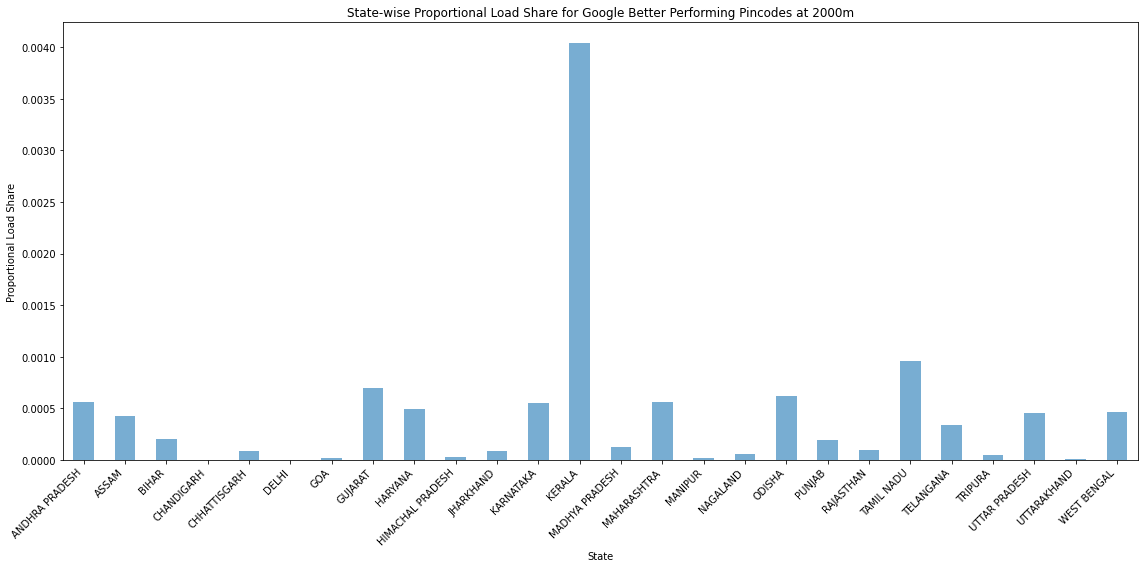

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
#print("Total Number of Pincodes for Each State:")
# print(state_pincode_counts)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
# print("Number of Common Pincodes for Each State:")
# print(state_common_pincode_counts)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    total_load_share, state_load_share = calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'total_load_share': total_load_share,
        'state_load_share': state_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"Total Load Share: {results[metric]['total_load_share'] , results[metric]['total_load_share']*total_orders}")
    print("State-wise Load Share:")
    print(results[metric]['state_load_share'] , results[metric]['state_load_share']*total_orders)
    print()

    state_load_share = results[metric]['state_load_share']
    plt.figure(figsize=(16, 8))
    state_load_share.plot(kind='bar', color='tab:blue', alpha=0.6)
    plt.xlabel('State')
    plt.ylabel('Proportional Load Share')
    plt.title(f'State-wise Proportional Load Share for Google Better Performing Pincodes at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Metric: 100m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH     3
CHANDIGARH         2
CHHATTISGARH       5
DELHI              1
GUJARAT            4
HARYANA            3
JHARKHAND          1
KARNATAKA          5
KERALA            27
MADHYA PRADESH     6
MAHARASHTRA       14
MEGHALAYA          1
ODISHA             4
PUNJAB             8
RAJASTHAN          1
TAMIL NADU         8
TELANGANA          6
UTTAR PRADESH      5
UTTARAKHAND        2
WEST BENGAL        3
Name: Pincode, dtype: int64



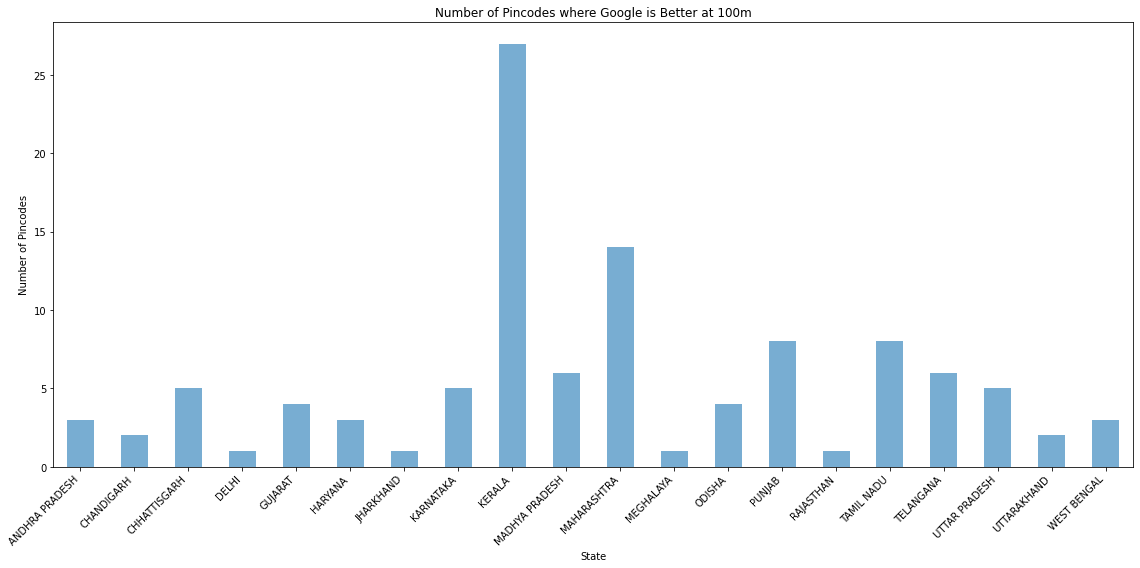

Metric: 200m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH       5
ASSAM                1
BIHAR                1
CHANDIGARH           1
CHHATTISGARH         3
DELHI                1
GUJARAT              6
HARYANA              3
HIMACHAL PRADESH     1
KARNATAKA            3
KERALA              30
MADHYA PRADESH       6
MAHARASHTRA         15
ODISHA               5
PUNJAB               7
RAJASTHAN            2
TAMIL NADU           8
TELANGANA            9
TRIPURA              1
UTTAR PRADESH        4
UTTARAKHAND          3
WEST BENGAL          5
Name: Pincode, dtype: int64



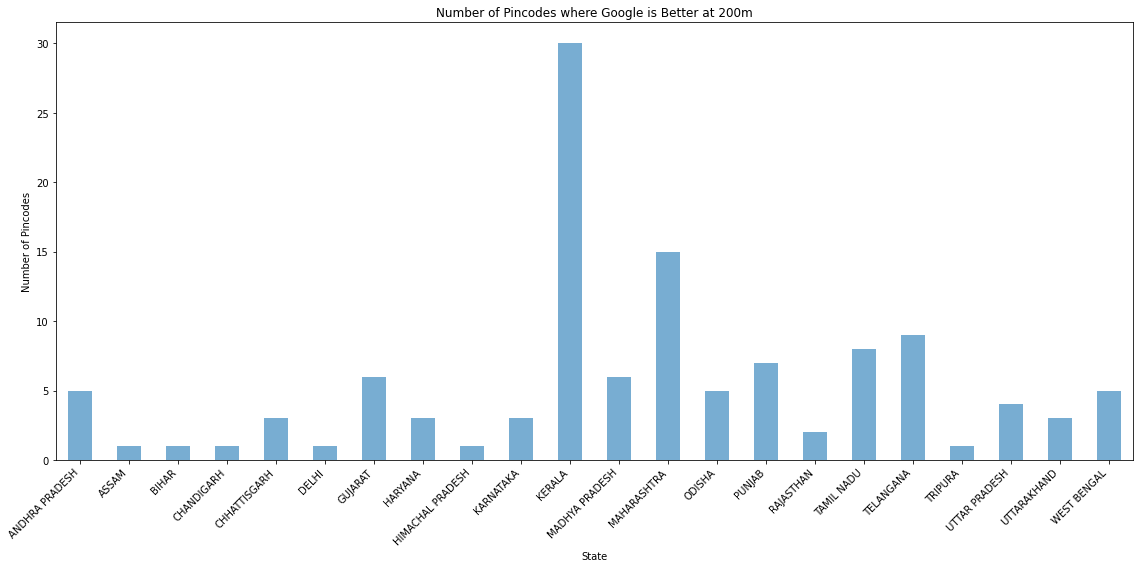

Metric: 500m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH      14
ASSAM                1
BIHAR                5
CHANDIGARH           2
CHHATTISGARH         7
DELHI                2
GUJARAT             22
HARYANA              5
HIMACHAL PRADESH     2
KARNATAKA            8
KERALA              46
MADHYA PRADESH      11
MAHARASHTRA         25
MEGHALAYA            1
ODISHA               9
PUNJAB              18
RAJASTHAN            5
TAMIL NADU          14
TELANGANA           13
TRIPURA              2
UTTAR PRADESH       13
UTTARAKHAND          4
WEST BENGAL          8
Name: Pincode, dtype: int64



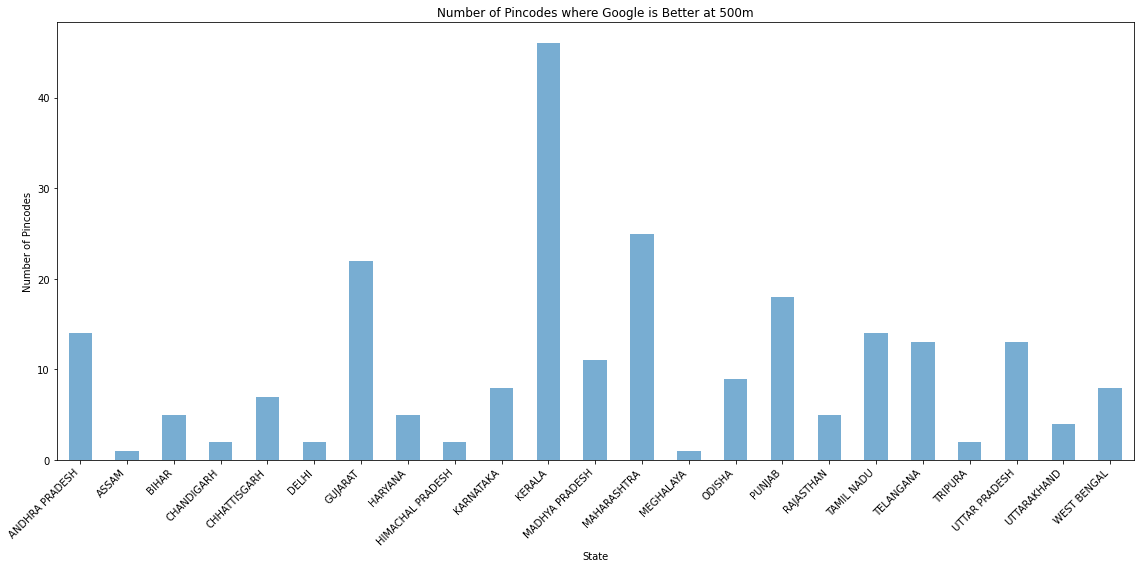

Metric: 1000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH      22
ASSAM                3
BIHAR                8
CHANDIGARH           2
CHHATTISGARH         8
DELHI                2
GOA                  1
GUJARAT             35
HARYANA              8
HIMACHAL PRADESH     3
JHARKHAND            3
KARNATAKA           20
KERALA              78
MADHYA PRADESH      18
MAHARASHTRA         46
MANIPUR              1
ODISHA              11
PUNJAB              23
RAJASTHAN            8
TAMIL NADU          36
TELANGANA           18
TRIPURA              3
UTTAR PRADESH       20
UTTARAKHAND          4
WEST BENGAL         16
Name: Pincode, dtype: int64



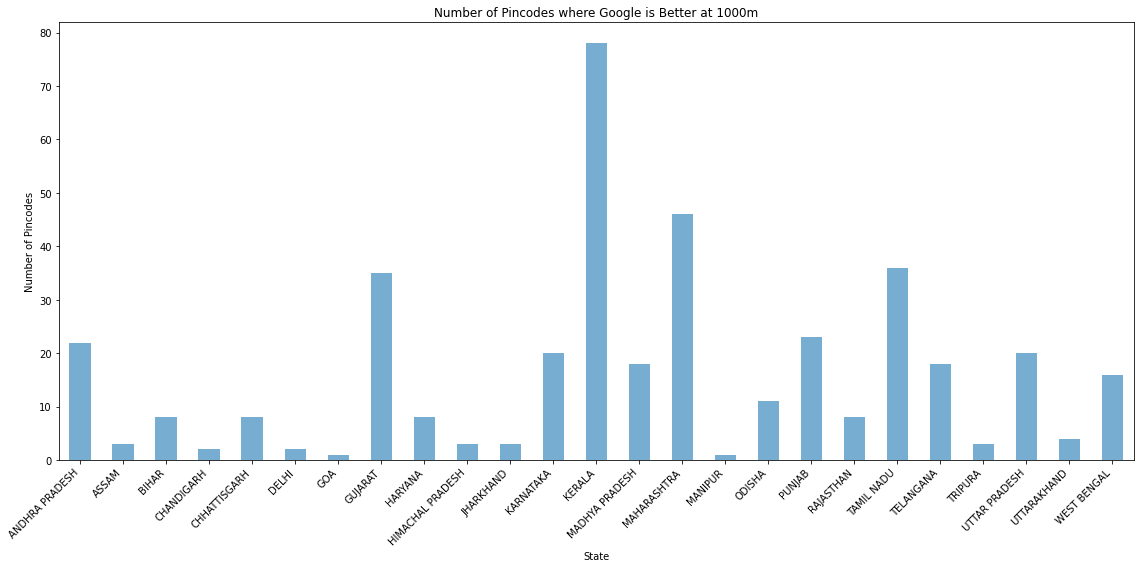

Metric: 2000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH       38
ASSAM                15
BIHAR                15
CHANDIGARH            3
CHHATTISGARH         11
DELHI                 2
GOA                   2
GUJARAT              53
HARYANA              17
HIMACHAL PRADESH      3
JHARKHAND             6
KARNATAKA            38
KERALA              159
MADHYA PRADESH       20
MAHARASHTRA          67
MANIPUR               1
NAGALAND              1
ODISHA               28
PUNJAB               32
RAJASTHAN             9
TAMIL NADU           75
TELANGANA            23
TRIPURA               3
UTTAR PRADESH        33
UTTARAKHAND           3
WEST BENGAL          23
Name: Pincode, dtype: int64



In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    state_pincode_count = calculate_pincode_count(better_pincodes, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'state_pincode_count': state_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_pincode_count'])
    print()

    state_pincode_count = results[metric]['state_pincode_count']
    plt.figure(figsize=(16, 8))
    state_pincode_count.plot(kind='bar', color='tab:blue', alpha=0.6)
    plt.xlabel('State')
    plt.ylabel('Number of Pincodes')
    plt.title(f'Number of Pincodes where Google is Better at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the pincode_dh_mapping dataframe
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# Calculate total orders
total_orders = sum(order_wise_count_pincode_wise_dict.values())
print(f"Total Orders: {total_orders}")

# Create proportional weight pincode-wise dictionary
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

# Add Proportional_Load_Share to df_mapping
df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

# Function to get better performing pincodes
def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

# Function to calculate load share
def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

# Calculate load share for 200 meter drift metric
better_pincodes_200m = get_better_performing_pincodes(200)
total_load_share_200m, state_load_share_200m = calculate_load_share(better_pincodes_200m, proportional_weight_pincode_wise_dict, df_mapping)

print(f"Metric: 200m")
print(f"Total Load Share: {total_load_share_200m , total_load_share_200m * total_orders}")
print("State-wise Load Share:")
print(state_load_share_200m, state_load_share_200m * total_orders)
print()

# Load the shapefile for India
india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape"  # Update with the path to your shapefile
gdf_india = gpd.read_file(india_shapefile_path)

# Ensure the state names match between the shapefile and the mapping data
gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
state_load_share_200m.index = state_load_share_200m.index.str.upper()

# Make necessary corrections
state_load_share_200m = state_load_share_200m.rename(index={'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH' , 'TELANGANA' : 'TELENGANA'})

# Merge the shapefile with the load share data
gdf_merged = gdf_india.set_index('State_Name').join(state_load_share_200m, how='left')

# Fill NaN values with 0
gdf_merged['Proportional_Load_Share'] = gdf_merged['Proportional_Load_Share'].fillna(0)

# Plot heatmap for 200 meter drift metric
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(column='Proportional_Load_Share', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State-wise Proportional Load Share for Google Better Performing Pincodes at 200m', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')
plt.show()


Total Orders: 833303834
Metric: 200m
Total Load Share: (0.0007881651004140227, 656781.0000000001)
State-wise Load Share:
State
ANDHRA PRADESH      1.636138e-05
ASSAM               1.109919e-05
BIHAR               5.454193e-06
CHANDIGARH          3.120110e-07
CHHATTISGARH        1.961469e-05
DELHI               1.171241e-06
GUJARAT             2.771138e-05
HARYANA             5.102581e-06
HIMACHAL PRADESH    1.450851e-06
KARNATAKA           1.582856e-05
KERALA              3.255991e-04
MADHYA PRADESH      1.260045e-05
MAHARASHTRA         5.499315e-05
ODISHA              1.320539e-04
PUNJAB              2.294001e-05
RAJASTHAN           1.939269e-06
TAMIL NADU          3.900498e-05
TELANGANA           4.492599e-05
TRIPURA             2.527529e-05
UTTAR PRADESH       6.595433e-06
UTTARAKHAND         6.030213e-06
WEST BENGAL         1.210123e-05
Name: Proportional_Load_Share, dtype: float64 State
ANDHRA PRADESH       13634.0
ASSAM                 9249.0
BIHAR                 4545.0
CHANDIGA

In [48]:
# Calculate the total proportional load share for the common pincodes
total_proportional_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict)

print(f"Total Proportional Load Share of Common Pincodes: {total_proportional_load_share}")


Total Proportional Load Share of Common Pincodes: 0.9077391092382752


Total Number of Pincodes for Each State:
State
ANDAMAN AND NICOBAR ISLANDS       1
ANDHRA PRADESH                  813
ARUNACHAL PRADESH                17
ASSAM                           510
BIHAR                           781
CHANDIGARH                       47
CHHATTISGARH                    214
DELHI                           119
GOA                             110
GUJARAT                         755
HARYANA                         304
HIMACHAL PRADESH                194
JAMMU AND KASHMIR                98
JHARKHAND                       327
KARNATAKA                      1012
KERALA                         1757
LADAKH                            3
MADHYA PRADESH                  531
MAHARASHTRA                    1299
MANIPUR                          24
MEGHALAYA                        26
MIZORAM                          17
NAGALAND                          9
ODISHA                          786
PUDUCHERRY                       22
PUNJAB                          425
RAJASTHAN        

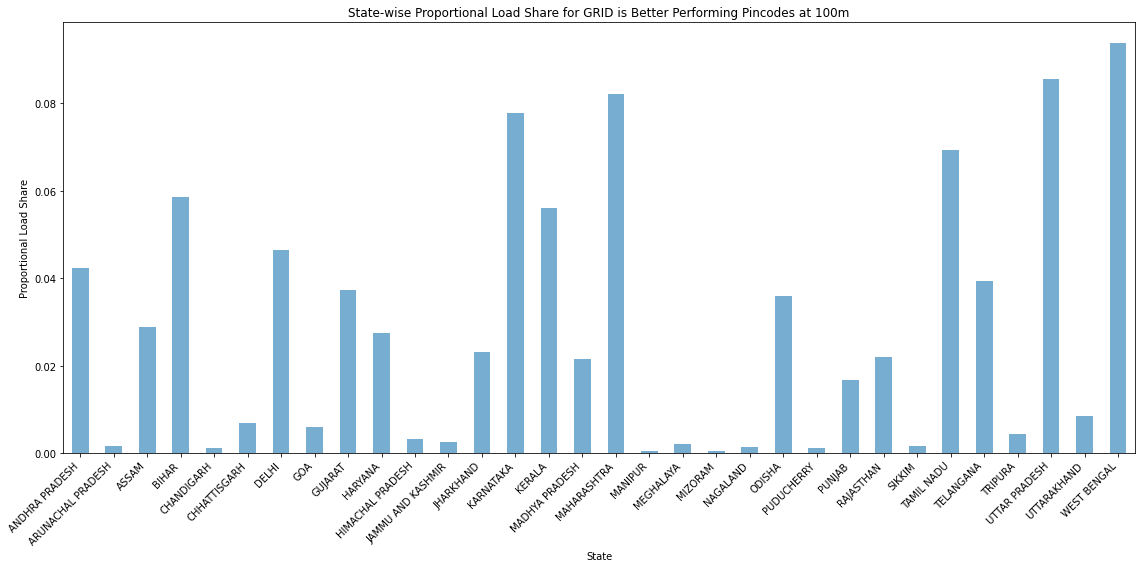

Metric: 200m
Total Load Share: (0.906357254321717, 755270974.9999999)
State-wise Load Share:
State
ANDHRA PRADESH       0.042217
ARUNACHAL PRADESH    0.001700
ASSAM                0.028840
BIHAR                0.058442
CHANDIGARH           0.001120
CHHATTISGARH         0.006885
DELHI                0.046556
GOA                  0.006069
GUJARAT              0.037197
HARYANA              0.027479
HIMACHAL PRADESH     0.003361
JAMMU AND KASHMIR    0.002564
JHARKHAND            0.023185
KARNATAKA            0.077704
KERALA               0.056058
MADHYA PRADESH       0.021551
MAHARASHTRA          0.082038
MANIPUR              0.000622
MEGHALAYA            0.002181
MIZORAM              0.000631
NAGALAND             0.001484
ODISHA               0.035961
PUDUCHERRY           0.001291
PUNJAB               0.016678
RAJASTHAN            0.022123
SIKKIM               0.001563
TAMIL NADU           0.069339
TELANGANA            0.039275
TRIPURA              0.004456
UTTAR PRADESH        0.085499
U

Metric: 500m
Total Load Share: (0.9050028047752863, 754142306.9999995)
State-wise Load Share:
State
ANDHRA PRADESH       0.042121
ARUNACHAL PRADESH    0.001700
ASSAM                0.028812
BIHAR                0.058413
CHANDIGARH           0.001119
CHHATTISGARH         0.006869
DELHI                0.046556
GOA                  0.006069
GUJARAT              0.037065
HARYANA              0.027400
HIMACHAL PRADESH     0.003329
JAMMU AND KASHMIR    0.002564
JHARKHAND            0.023186
KARNATAKA            0.077624
KERALA               0.055849
MADHYA PRADESH       0.021539
MAHARASHTRA          0.081917
MANIPUR              0.000622
MEGHALAYA            0.002172
MIZORAM              0.000631
NAGALAND             0.001484
ODISHA               0.035936
PUDUCHERRY           0.001291
PUNJAB               0.016626
RAJASTHAN            0.022091
SIKKIM               0.001563
TAMIL NADU           0.069172
TELANGANA            0.039201
TRIPURA              0.004456
UTTAR PRADESH        0.085400


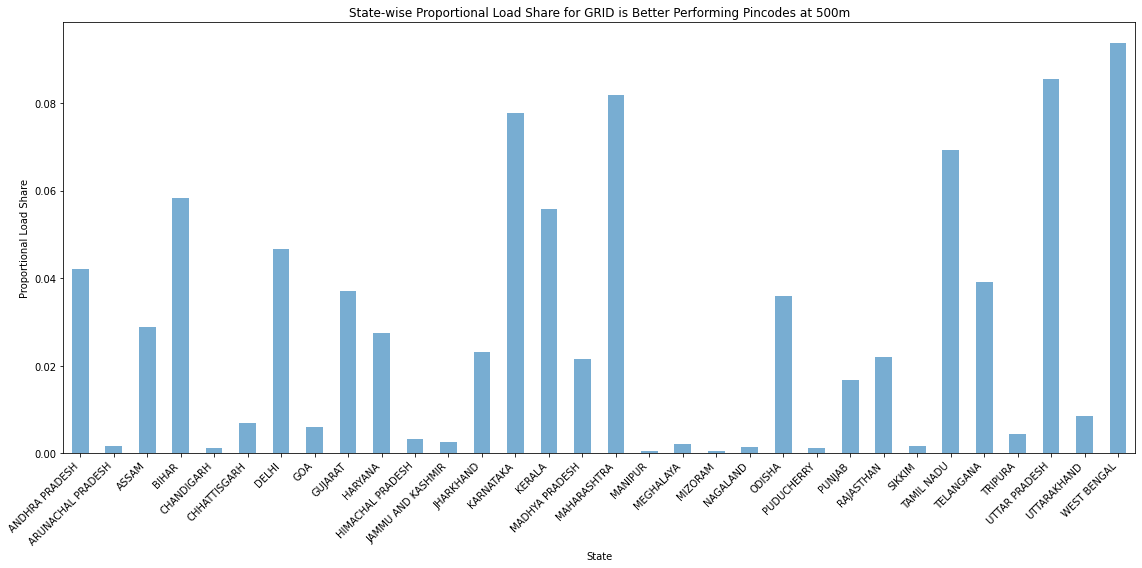

Metric: 1000m
Total Load Share: (0.9022014220085787, 751807904.0000006)
State-wise Load Share:
State
ANDHRA PRADESH       0.041930
ARUNACHAL PRADESH    0.001700
ASSAM                0.028830
BIHAR                0.058397
CHANDIGARH           0.001115
CHHATTISGARH         0.006856
DELHI                0.046555
GOA                  0.006062
GUJARAT              0.036874
HARYANA              0.027254
HIMACHAL PRADESH     0.003332
JAMMU AND KASHMIR    0.002564
JHARKHAND            0.023138
KARNATAKA            0.077433
KERALA               0.054963
MADHYA PRADESH       0.021449
MAHARASHTRA          0.081758
MANIPUR              0.000601
MEGHALAYA            0.002181
MIZORAM              0.000631
NAGALAND             0.001484
ODISHA               0.035909
PUDUCHERRY           0.001291
PUNJAB               0.016585
RAJASTHAN            0.022069
SIKKIM               0.001563
TAMIL NADU           0.068973
TELANGANA            0.039056
TRIPURA              0.004416
UTTAR PRADESH        0.085224

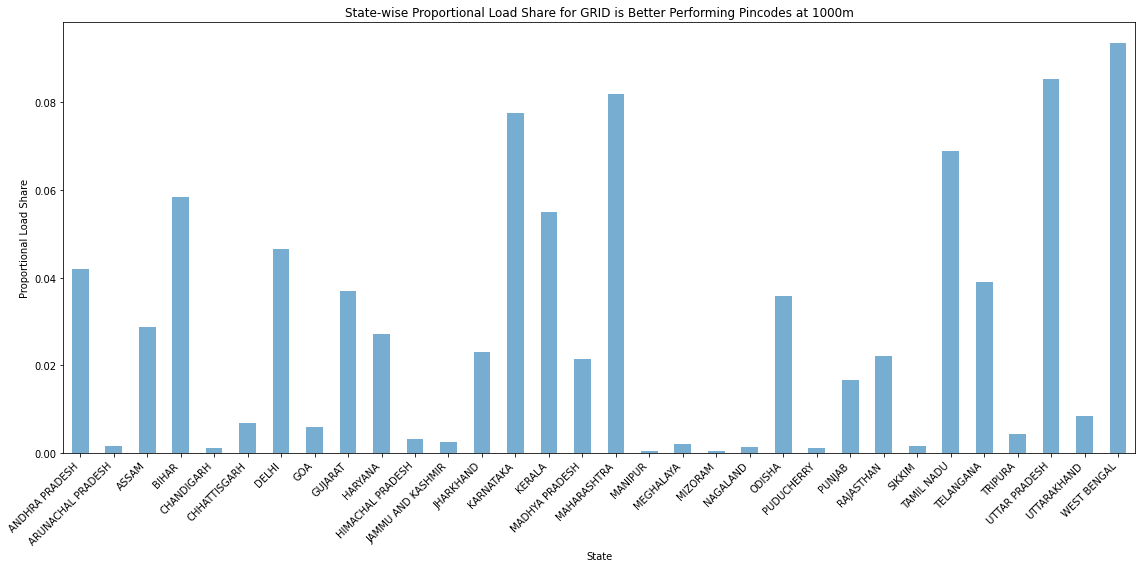

Metric: 2000m
Total Load Share: (0.8948064758333997, 745645667.0000002)
State-wise Load Share:
State
ANDHRA PRADESH       0.041651
ARUNACHAL PRADESH    0.001700
ASSAM                0.028429
BIHAR                0.058247
CHANDIGARH           0.001115
CHHATTISGARH         0.006816
DELHI                0.046540
GOA                  0.006052
GUJARAT              0.036490
HARYANA              0.026931
HIMACHAL PRADESH     0.003290
JAMMU AND KASHMIR    0.002556
JHARKHAND            0.023014
KARNATAKA            0.077081
KERALA               0.052196
MADHYA PRADESH       0.021392
MAHARASHTRA          0.081420
MANIPUR              0.000568
MEGHALAYA            0.002181
MIZORAM              0.000629
NAGALAND             0.001429
ODISHA               0.035350
PUDUCHERRY           0.001291
PUNJAB               0.016500
RAJASTHAN            0.022008
SIKKIM               0.001563
TAMIL NADU           0.068233
TELANGANA            0.038961
TRIPURA              0.004392
UTTAR PRADESH        0.084952

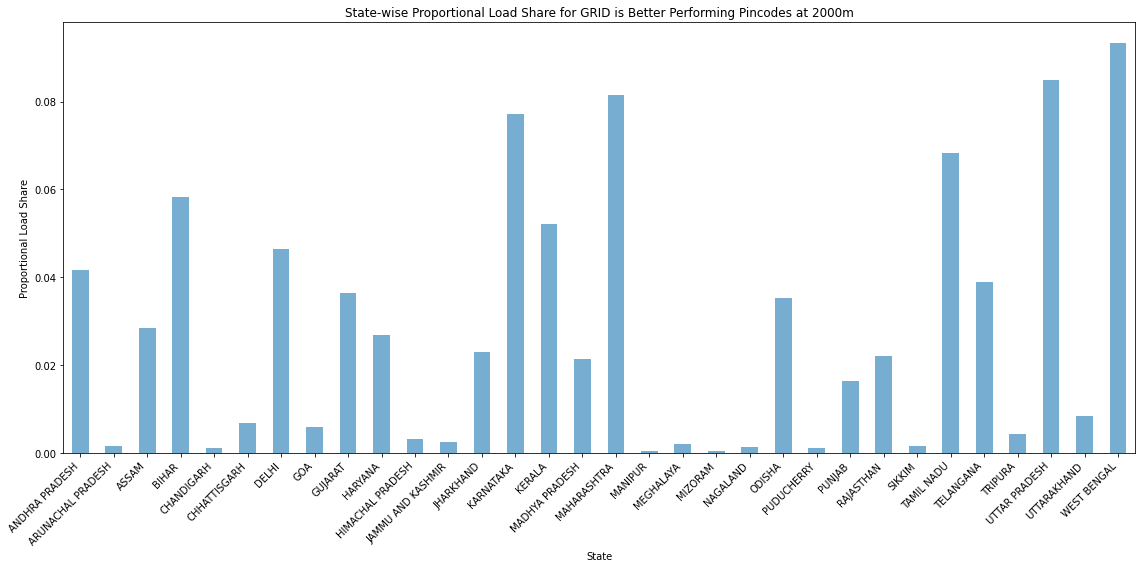

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
print("Total Number of Pincodes for Each State:")
print(state_pincode_counts)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
print("Number of Common Pincodes for Each State:")
print(state_common_pincode_counts)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

total_proportional_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict)
print(f"Total Proportional Load Share of Common Pincodes: {total_proportional_load_share}")

df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    total_load_share, state_load_share = calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'total_load_share': total_load_share,
        'state_load_share': state_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"Total Load Share: {results[metric]['total_load_share'] , results[metric]['total_load_share']*total_orders}")
    print("State-wise Load Share:")
    print(results[metric]['state_load_share'],results[metric]['state_load_share']*total_orders)
    print()

    state_load_share = results[metric]['state_load_share']
    plt.figure(figsize=(16, 8))
    state_load_share.plot(kind='bar', color='tab:blue', alpha=0.6)
    plt.xlabel('State')
    plt.ylabel('Proportional Load Share')
    plt.title(f'State-wise Proportional Load Share for GRID is Better Performing Pincodes at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Metric: 100m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH        560
ARUNACHAL PRADESH       7
ASSAM                 361
BIHAR                 604
CHANDIGARH             37
CHHATTISGARH           98
DELHI                 104
GOA                    87
GUJARAT               576
HARYANA               221
HIMACHAL PRADESH       66
JAMMU AND KASHMIR      33
JHARKHAND             240
KARNATAKA             688
KERALA               1263
MADHYA PRADESH        224
MAHARASHTRA           837
MANIPUR                11
MEGHALAYA              20
MIZORAM                11
NAGALAND                8
ODISHA                476
PUDUCHERRY             22
PUNJAB                257
RAJASTHAN             184
SIKKIM                  8
TAMIL NADU           1190
TELANGANA             289
TRIPURA                47
UTTAR PRADESH         663
UTTARAKHAND            68
WEST BENGAL          1059
Name: Pincode, dtype: int64



Metric: 200m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH        558
ARUNACHAL PRADESH       7
ASSAM                 361
BIHAR                 601
CHANDIGARH             36
CHHATTISGARH           97
DELHI                 105
GOA                    87
GUJARAT               575
HARYANA               221
HIMACHAL PRADESH       66
JAMMU AND KASHMIR      33
JHARKHAND             241
KARNATAKA             690
KERALA               1268
MADHYA PRADESH        225
MAHARASHTRA           838
MANIPUR                11
MEGHALAYA              20
MIZORAM                11
NAGALAND                8
ODISHA                476
PUDUCHERRY             22
PUNJAB                256
RAJASTHAN             184
SIKKIM                  8
TAMIL NADU           1190
TELANGANA             289
TRIPURA                46
UTTAR PRADESH         664
UTTARAKHAND            68
WEST BENGAL          1060
Name: Pincode, dtype: int64



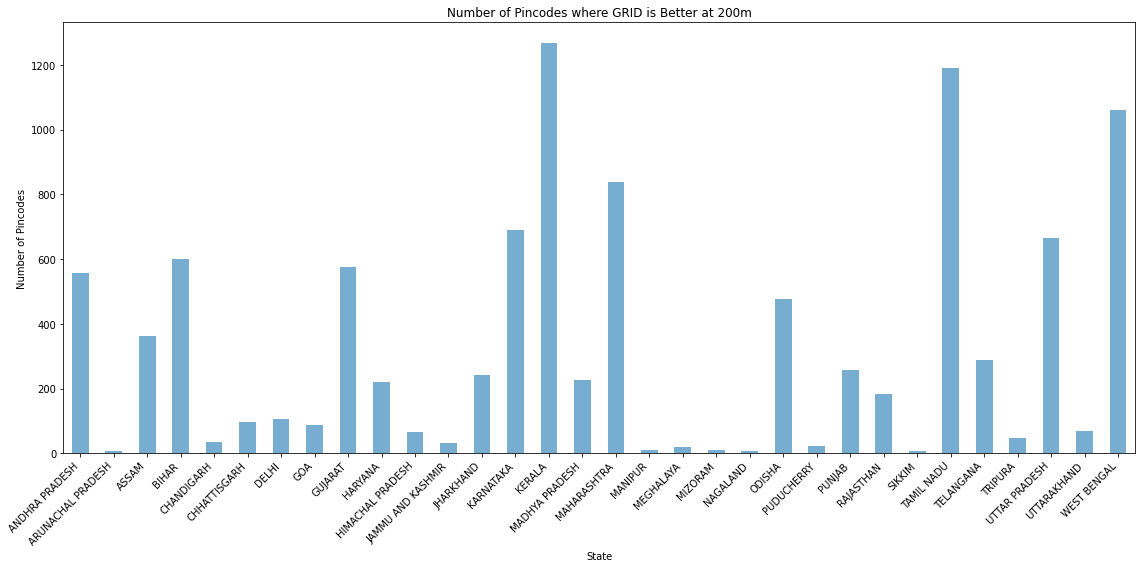

Metric: 500m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH        545
ARUNACHAL PRADESH       7
ASSAM                 360
BIHAR                 598
CHANDIGARH             32
CHHATTISGARH           95
DELHI                 105
GOA                    87
GUJARAT               550
HARYANA               218
HIMACHAL PRADESH       62
JAMMU AND KASHMIR      33
JHARKHAND             240
KARNATAKA             682
KERALA               1279
MADHYA PRADESH        219
MAHARASHTRA           821
MANIPUR                11
MEGHALAYA              20
MIZORAM                11
NAGALAND                8
ODISHA                471
PUDUCHERRY             22
PUNJAB                247
RAJASTHAN             180
SIKKIM                  8
TAMIL NADU           1171
TELANGANA             281
TRIPURA                46
UTTAR PRADESH         656
UTTARAKHAND            67
WEST BENGAL          1061
Name: Pincode, dtype: int64



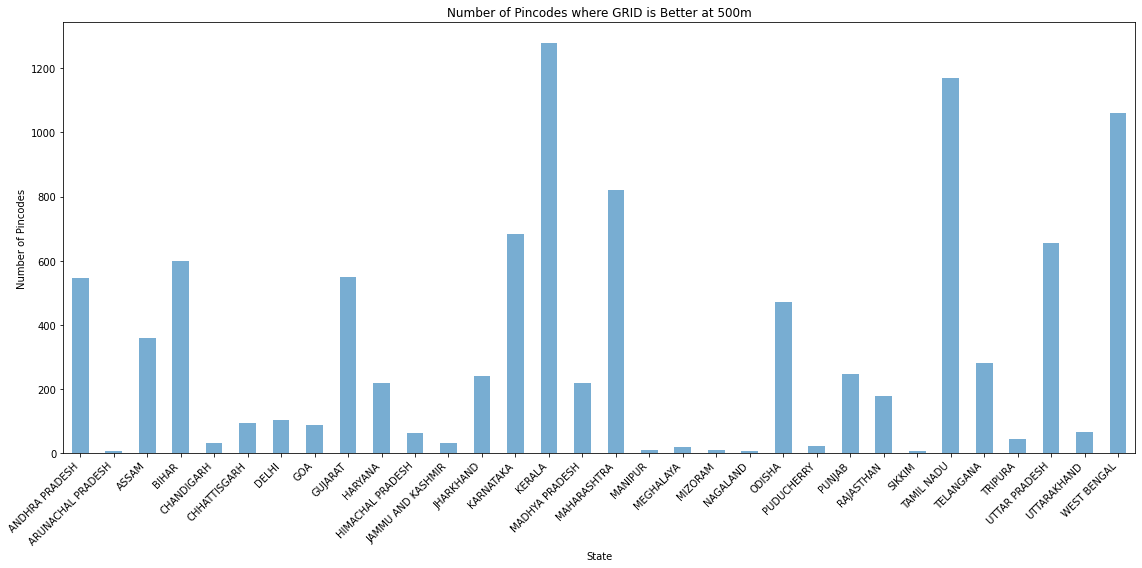

Metric: 1000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH        535
ARUNACHAL PRADESH       7
ASSAM                 360
BIHAR                 595
CHANDIGARH             27
CHHATTISGARH           93
DELHI                 104
GOA                    86
GUJARAT               531
HARYANA               215
HIMACHAL PRADESH       62
JAMMU AND KASHMIR      33
JHARKHAND             236
KARNATAKA             670
KERALA               1235
MADHYA PRADESH        212
MAHARASHTRA           802
MANIPUR                10
MEGHALAYA              20
MIZORAM                11
NAGALAND                8
ODISHA                466
PUDUCHERRY             22
PUNJAB                242
RAJASTHAN             179
SIKKIM                  8
TAMIL NADU           1157
TELANGANA             274
TRIPURA                43
UTTAR PRADESH         643
UTTARAKHAND            67
WEST BENGAL          1054
Name: Pincode, dtype: int64



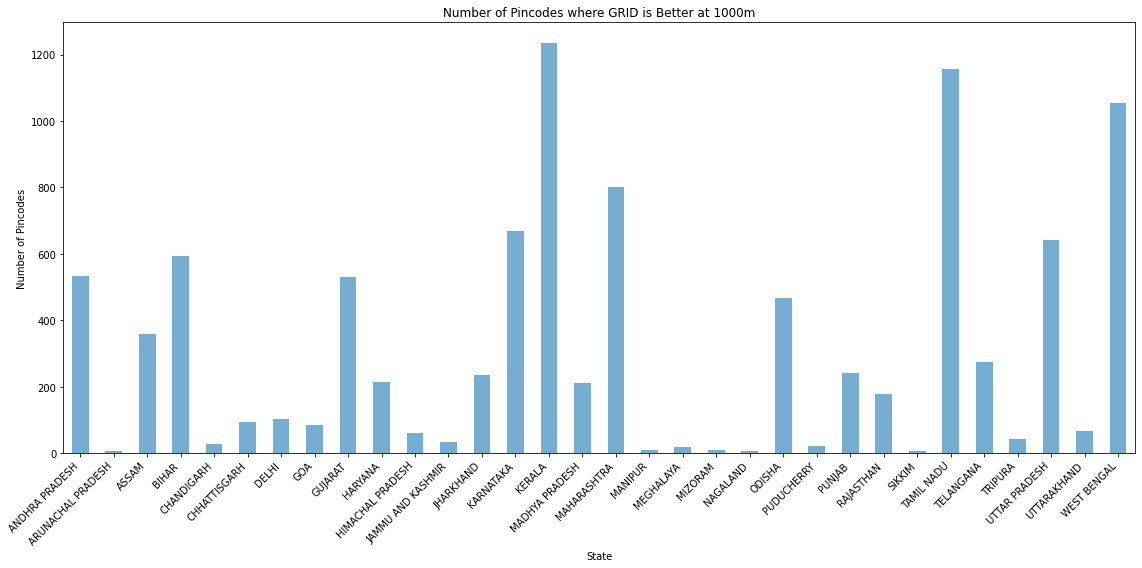

Metric: 2000m
State-wise Pincode Count where Google is Better:
State
ANDHRA PRADESH        521
ARUNACHAL PRADESH       7
ASSAM                 346
BIHAR                 585
CHANDIGARH             25
CHHATTISGARH           90
DELHI                 102
GOA                    85
GUJARAT               515
HARYANA               202
HIMACHAL PRADESH       60
JAMMU AND KASHMIR      32
JHARKHAND             229
KARNATAKA             642
KERALA               1129
MADHYA PRADESH        203
MAHARASHTRA           770
MANIPUR                 9
MEGHALAYA              20
MIZORAM                10
NAGALAND                7
ODISHA                440
PUDUCHERRY             22
PUNJAB                230
RAJASTHAN             176
SIKKIM                  8
TAMIL NADU           1102
TELANGANA             267
TRIPURA                41
UTTAR PRADESH         622
UTTARAKHAND            68
WEST BENGAL          1041
Name: Pincode, dtype: int64



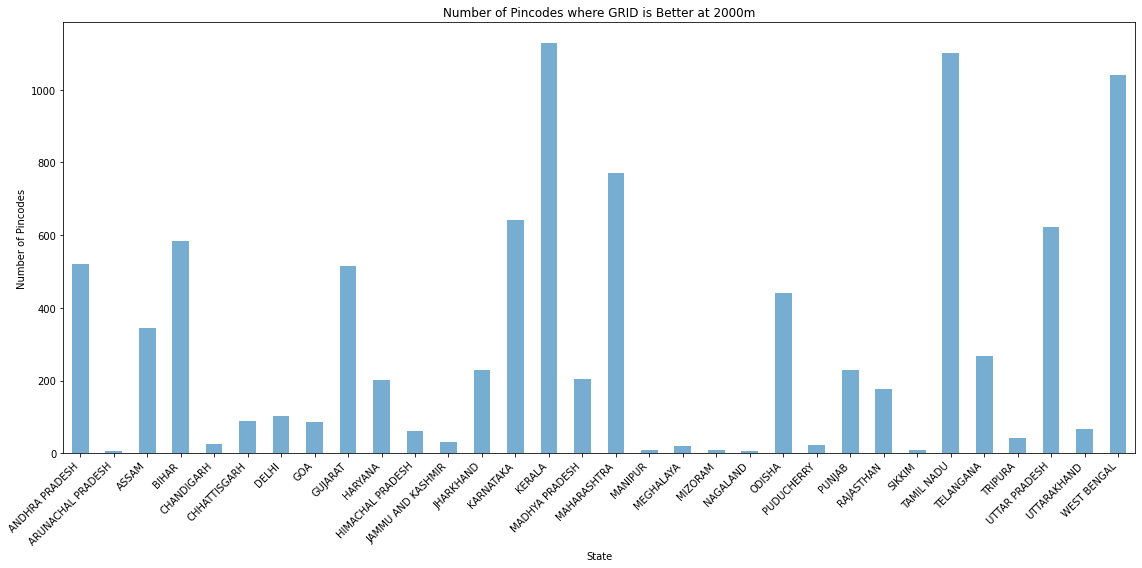

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_pincode_count(better_pincodes, df_mapping):
    state_pincode_count = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Pincode'].count()
    return state_pincode_count

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    state_pincode_count = calculate_pincode_count(better_pincodes, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'state_pincode_count': state_pincode_count
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"State-wise Pincode Count where Google is Better:")
    print(results[metric]['state_pincode_count'])
    print()

    state_pincode_count = results[metric]['state_pincode_count']
    plt.figure(figsize=(16, 8))
    state_pincode_count.plot(kind='bar', color='tab:blue', alpha=0.6)
    plt.xlabel('State')
    plt.ylabel('Number of Pincodes')
    plt.title(f'Number of Pincodes where GRID is Better at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Total Orders: 833303834
Metric: 200m
Total Load Share: (0.906357254321717, 755270974.9999999)
State-wise Load Share:
State
ANDHRA PRADESH       0.042217
ARUNACHAL PRADESH    0.001700
ASSAM                0.028840
BIHAR                0.058442
CHANDIGARH           0.001120
CHHATTISGARH         0.006885
DELHI                0.046556
GOA                  0.006069
GUJARAT              0.037197
HARYANA              0.027479
HIMACHAL PRADESH     0.003361
JAMMU AND KASHMIR    0.002564
JHARKHAND            0.023185
KARNATAKA            0.077704
KERALA               0.056058
MADHYA PRADESH       0.021551
MAHARASHTRA          0.082038
MANIPUR              0.000622
MEGHALAYA            0.002181
MIZORAM              0.000631
NAGALAND             0.001484
ODISHA               0.035961
PUDUCHERRY           0.001291
PUNJAB               0.016678
RAJASTHAN            0.022123
SIKKIM               0.001563
TAMIL NADU           0.069339
TELANGANA            0.039275
TRIPURA              0.004456
UTTAR P

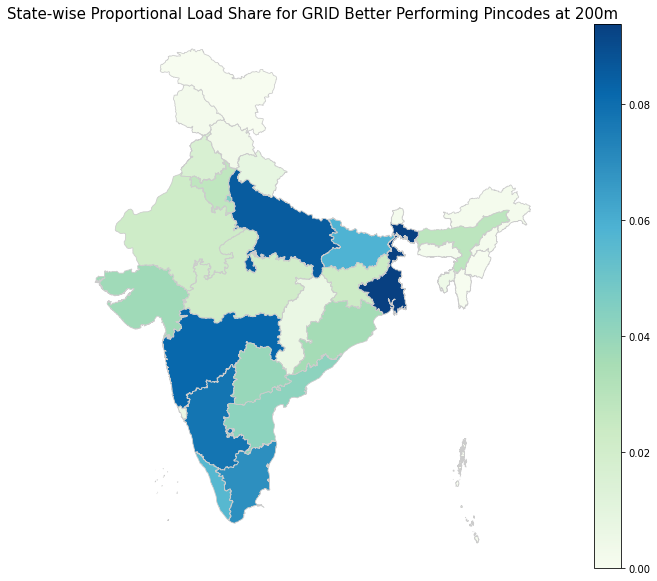

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
print(f"Total Orders: {total_orders}")

proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes_model1(metric):
    better_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] > pincode_wise_acc_dict_google[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_load_share_model1(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

better_pincodes_200m_model1 = get_better_performing_pincodes_model1(200)
total_load_share_200m_model1, state_load_share_200m_model1 = calculate_load_share_model1(better_pincodes_200m_model1, proportional_weight_pincode_wise_dict, df_mapping)

print(f"Metric: 200m")
print(f"Total Load Share: {total_load_share_200m_model1 , total_load_share_200m_model1 * total_orders}")
print("State-wise Load Share:")
print(state_load_share_200m_model1, state_load_share_200m_model1 * total_orders)
print()

india_shapefile_path = "/home/uddeshya.singh/Experiments/India-shape"  # Update with the path to your shapefile
gdf_india = gpd.read_file(india_shapefile_path)

gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
state_load_share_200m_model1.index = state_load_share_200m_model1.index.str.upper()

state_load_share_200m_model1 = state_load_share_200m_model1.rename(index={'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH', 'TELANGANA': 'TELENGANA'})

gdf_merged = gdf_india.set_index('State_Name').join(state_load_share_200m_model1, how='left')

gdf_merged['Proportional_Load_Share'] = gdf_merged['Proportional_Load_Share'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(column='Proportional_Load_Share', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State-wise Proportional Load Share for GRID Better Performing Pincodes at 200m', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')
plt.show()


Total Number of Pincodes for Each State:
State
ANDAMAN AND NICOBAR ISLANDS       1
ANDHRA PRADESH                  813
ARUNACHAL PRADESH                17
ASSAM                           510
BIHAR                           781
CHANDIGARH                       47
CHHATTISGARH                    214
DELHI                           119
GOA                             110
GUJARAT                         755
HARYANA                         304
HIMACHAL PRADESH                194
JAMMU AND KASHMIR                98
JHARKHAND                       327
KARNATAKA                      1012
KERALA                         1757
LADAKH                            3
MADHYA PRADESH                  531
MAHARASHTRA                    1299
MANIPUR                          24
MEGHALAYA                        26
MIZORAM                          17
NAGALAND                          9
ODISHA                          786
PUDUCHERRY                       22
PUNJAB                          425
RAJASTHAN        

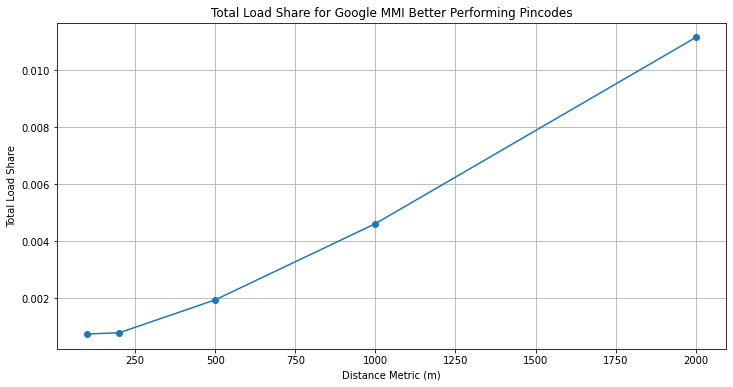

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
print("Total Number of Pincodes for Each State:")
print(state_pincode_counts)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
print("Number of Common Pincodes for Each State:")
print(state_common_pincode_counts)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

missing_pincodes = [pin for pin in common_pincode_list if int(pin) not in proportional_weight_pincode_wise_dict]
print(f"Missing Pincodes: {missing_pincodes}")

adjusted_common_pincode_list = [pin for pin in common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict]

total_proportional_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in adjusted_common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict)
print(f"Total Proportional Load Share of Adjusted Common Pincodes: {total_proportional_load_share}")

df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in adjusted_common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] > updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    total_load_share, state_load_share = calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'total_load_share': total_load_share,
        'state_load_share': state_load_share
    }

load_shares = [results[metric]['total_load_share'] for metric in metrics]

plt.figure(figsize=(12, 6))
plt.plot(metrics, load_shares, marker='o', color='tab:blue')
plt.xlabel('Distance Metric (m)')
plt.ylabel('Total Load Share')
plt.title('Total Load Share for Google MMI Better Performing Pincodes')
plt.grid(True)
plt.show()


Total Number of Pincodes for Each State:
State
ANDAMAN AND NICOBAR ISLANDS       1
ANDHRA PRADESH                  813
ARUNACHAL PRADESH                17
ASSAM                           510
BIHAR                           781
CHANDIGARH                       47
CHHATTISGARH                    214
DELHI                           119
GOA                             110
GUJARAT                         755
HARYANA                         304
HIMACHAL PRADESH                194
JAMMU AND KASHMIR                98
JHARKHAND                       327
KARNATAKA                      1012
KERALA                         1757
LADAKH                            3
MADHYA PRADESH                  531
MAHARASHTRA                    1299
MANIPUR                          24
MEGHALAYA                        26
MIZORAM                          17
NAGALAND                          9
ODISHA                          786
PUDUCHERRY                       22
PUNJAB                          425
RAJASTHAN        

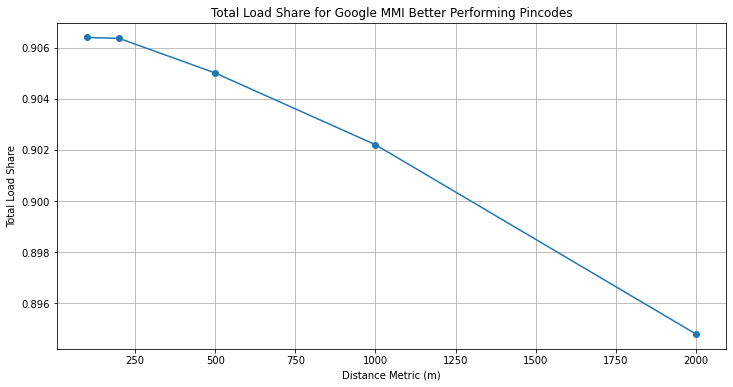

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
print("Total Number of Pincodes for Each State:")
print(state_pincode_counts)
common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
print("Number of Common Pincodes for Each State:")
print(state_common_pincode_counts)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

missing_pincodes = [pin for pin in common_pincode_list if int(pin) not in proportional_weight_pincode_wise_dict]
print(f"Missing Pincodes: {missing_pincodes}")

adjusted_common_pincode_list = [pin for pin in common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict]

total_proportional_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in adjusted_common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict)
print(f"Total Proportional Load Share of Adjusted Common Pincodes: {total_proportional_load_share}")

df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_pincodes = []
    for pin in adjusted_common_pincode_list:
        pin_int = int(pin)  # Convert pin to integer for comparison
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_pincodes.append(pin_int)
    return better_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_pincodes = get_better_performing_pincodes(metric)
    total_load_share, state_load_share = calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'better_pincodes': better_pincodes,
        'total_load_share': total_load_share,
        'state_load_share': state_load_share
    }

load_shares = [results[metric]['total_load_share'] for metric in metrics]

plt.figure(figsize=(12, 6))
plt.plot(metrics, load_shares, marker='o', color='tab:blue')
plt.xlabel('Distance Metric (m)')
plt.ylabel('Total Load Share')
plt.title('Total Load Share for Google MMI Better Performing Pincodes')
plt.grid(True)
plt.show()


Total Number of Pincodes for Each State:
State
ANDAMAN AND NICOBAR ISLANDS       1
ANDHRA PRADESH                  813
ARUNACHAL PRADESH                17
ASSAM                           510
BIHAR                           781
CHANDIGARH                       47
CHHATTISGARH                    214
DELHI                           119
GOA                             110
GUJARAT                         755
HARYANA                         304
HIMACHAL PRADESH                194
JAMMU AND KASHMIR                98
JHARKHAND                       327
KARNATAKA                      1012
KERALA                         1757
LADAKH                            3
MADHYA PRADESH                  531
MAHARASHTRA                    1299
MANIPUR                          24
MEGHALAYA                        26
MIZORAM                          17
NAGALAND                          9
ODISHA                          786
PUDUCHERRY                       22
PUNJAB                          425
RAJASTHAN        

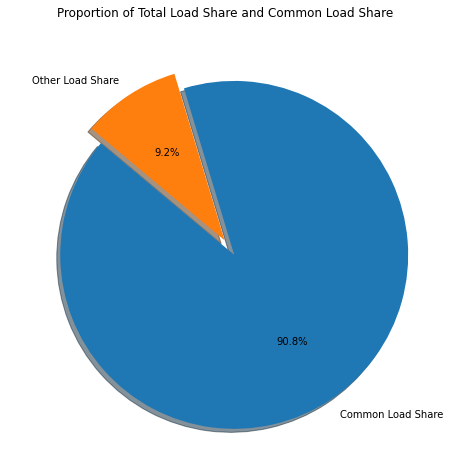

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)


state_pincode_counts = df_mapping.groupby('State')['Pincode'].nunique()
print("Total Number of Pincodes for Each State:")
print(state_pincode_counts)


common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_pincode_counts = df_mapping[df_mapping['Is_Common']].groupby('State')['Pincode'].nunique()
print("Number of Common Pincodes for Each State:")
print(state_common_pincode_counts)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_pincode_counts,
    'Common_Pincodes': state_common_pincode_counts
}).fillna(0)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}

missing_pincodes = [pin for pin in common_pincode_list if int(pin) not in proportional_weight_pincode_wise_dict]
print(f"Missing Pincodes: {missing_pincodes}")

adjusted_common_pincode_list = [pin for pin in common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict]


total_proportional_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in adjusted_common_pincode_list if int(pin) in proportional_weight_pincode_wise_dict)
print(f"Total Proportional Load Share of Adjusted Common Pincodes: {total_proportional_load_share}")


total_load_share = 1.0  # Total load share is always 1
common_load_share = total_proportional_load_share

# Data for the pie chart
labels = ['Common Load Share', 'Other Load Share']
sizes = [common_load_share, total_load_share - common_load_share]
colors = ['tab:blue', 'tab:orange']
explode = (0.1, 0)  # explode the common load share slice

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Total Load Share and Common Load Share')
plt.show()


In [54]:
0.9077391092382726*833303834

756422479.9999974

In [55]:
755300460+622923

755923383

In [56]:
906392/907739

0.9985160932823202

In [57]:
894806/907739

0.9857525125614301

Metric: 100m
Number of Pincodes with Accuracy 0-0.2: 671
Total Load Share for Pincodes with Accuracy 0-0.2: 0.012681267706731825

Metric: 200m
Number of Pincodes with Accuracy 0-0.2: 377
Total Load Share for Pincodes with Accuracy 0-0.2: 0.0049759281438755505

Metric: 500m
Number of Pincodes with Accuracy 0-0.2: 158
Total Load Share for Pincodes with Accuracy 0-0.2: 0.0006025077282915752

Metric: 1000m
Number of Pincodes with Accuracy 0-0.2: 119
Total Load Share for Pincodes with Accuracy 0-0.2: 0.0003812582962386803

Metric: 2000m
Number of Pincodes with Accuracy 0-0.2: 79
Total Load Share for Pincodes with Accuracy 0-0.2: 0.00021987778349763363



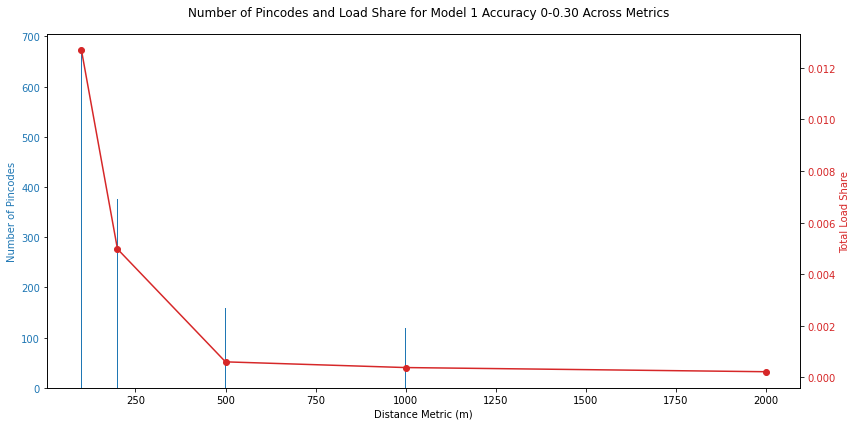

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def get_pincodes_with_low_accuracy(metric, threshold_min, threshold_max):
    low_accuracy_pincodes = [pin for pin in common_pincode_list if threshold_min <= updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric] <= threshold_max]
    return low_accuracy_pincodes

def calculate_low_accuracy_stats(low_accuracy_pincodes, proportional_weight_pincode_wise_dict):
    num_pincodes = len(low_accuracy_pincodes)
    total_load_share = sum(proportional_weight_pincode_wise_dict[int(pin)] for pin in low_accuracy_pincodes if int(pin) in proportional_weight_pincode_wise_dict)
    return num_pincodes, total_load_share

metrics = [100, 200, 500, 1000, 2000]
low_accuracy_results = {}

for metric in metrics:
    low_accuracy_pincodes = get_pincodes_with_low_accuracy(metric, 0, 0.25)
    num_pincodes, total_load_share = calculate_low_accuracy_stats(low_accuracy_pincodes, proportional_weight_pincode_wise_dict)
    low_accuracy_results[metric] = {
        'low_accuracy_pincodes': low_accuracy_pincodes,
        'num_pincodes': num_pincodes,
        'total_load_share': total_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"Number of Pincodes with Accuracy 0-0.2: {low_accuracy_results[metric]['num_pincodes']}")
    print(f"Total Load Share for Pincodes with Accuracy 0-0.2: {low_accuracy_results[metric]['total_load_share']}")
    print()

metrics = [100, 200, 500, 1000, 2000]
num_pincodes = [low_accuracy_results[metric]['num_pincodes'] for metric in metrics]
total_load_share = [low_accuracy_results[metric]['total_load_share'] for metric in metrics]

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Distance Metric (m)')
ax1.set_ylabel('Number of Pincodes', color=color)
ax1.bar(metrics, num_pincodes, color=color, alpha=1.0, label='Number of Pincodes')
ax1.tick_params(axis='y', labelcolor=color)

# Plot load share as line
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Load Share', color=color)
ax2.plot(metrics, total_load_share, color=color, marker='o', label='Total Load Share')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
fig.suptitle('Number of Pincodes and Load Share for Model 1 Accuracy 0-0.30 Across Metrics')
fig.tight_layout()
plt.show()


In [59]:
df_mapping.head()

Sl No Pincode             HubName       PARTNERCENTRE     Code  State  \
0      1  110001    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
1      2  110002    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
2      3  110003    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
3      4  110004    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
4      5  110005  JhandewalanHub_DEL  JhandewalanHub_DEL  DEL/JWN  DELHI   

    Zone Type       Status        RCA  ... COD Current Status COD RCA  \
0  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
1  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
2  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
3  NORTH   DH  Serviceable  All Clear  ...               True     NaN   
4  NORTH   DH  Serviceable  All Clear  ...               True     NaN   

  COD Switch Off date  COD restoration date              Myntra  \
0                 NaN                   NaN    PAHARGANJHUB_DEL   
1                 NaN                   NaN    DARYAGANJHUB_DEL   
2                 NaN                   NaN    DARYAGANJHUB_DEL   
3                 NaN                   NaN    PAHARGANJHUB_DEL   
4                 NaN                   NaN  JHANDEWALANHUB_DEL   

           check 1 Aging Embargo Aging COD  Aging Embargo Bucket Is_Common  
0  Independent_EKL           0.0       0.0                 FALSE      True  
1  Independent_EKL           0.0       0.0                 FALSE      True  
2  Independent_EKL           0.0       0.0                 FALSE      True  
3  Independent_EKL           0.0       0.0                 FALSE      True  
4  Independent_EKL           0.0       0.0                 FALSE      True  

[5 rows x 33 columns]

Total Load Share for Each State:
State
ANDAMAN AND NICOBAR ISLANDS           0.0
ANDHRA PRADESH                 40085497.0
ARUNACHAL PRADESH               1437257.0
ASSAM                          26351450.0
BIHAR                          51670428.0
CHANDIGARH                       934289.0
CHHATTISGARH                    7601786.0
DELHI                          41738164.0
GOA                             5383284.0
GUJARAT                        33003370.0
HARYANA                        24987787.0
HIMACHAL PRADESH                4477937.0
JAMMU AND KASHMIR               2609801.0
JHARKHAND                      20622927.0
KARNATAKA                      69552349.0
KERALA                         51998585.0
LADAKH                                0.0
MADHYA PRADESH                 22602469.0
MAHARASHTRA                    74642315.0
MANIPUR                         1112816.0
MEGHALAYA                       1922579.0
MIZORAM                          830200.0
NAGALAND                        13189

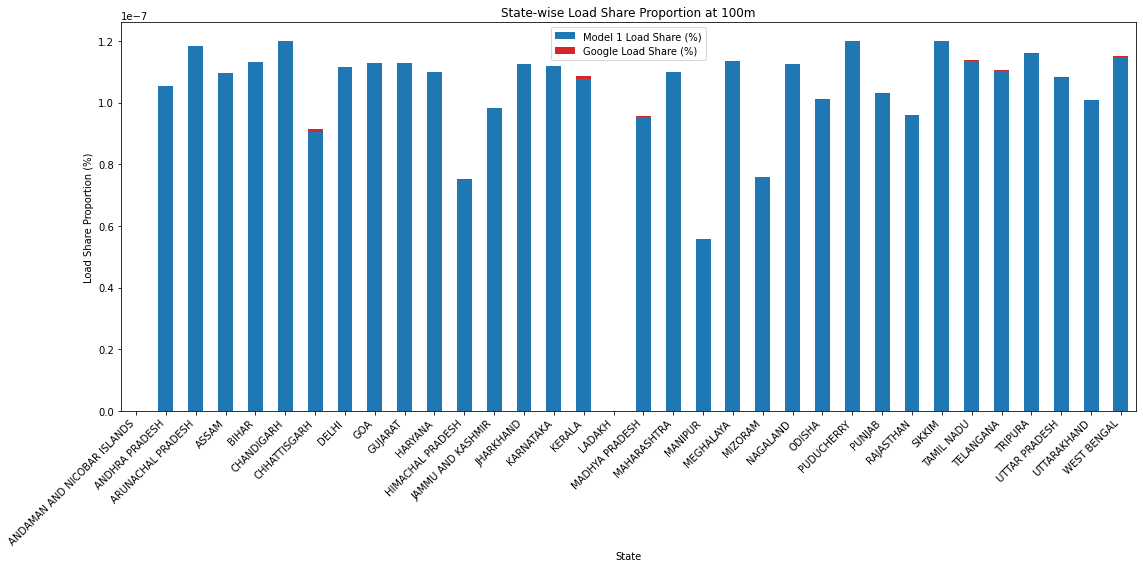

Metric: 200m
Model 1 Total Load Share: 0.906357254321717
Google MMI Total Load Share: 0.001381854916558561
State-wise Load Share Proportion:
                             Model 1 Load Share (%)  Google Load Share (%)
State                                                                     
ANDAMAN AND NICOBAR ISLANDS            0.000000e+00           0.000000e+00
ANDHRA PRADESH                         1.053183e-07           6.756798e-11
ARUNACHAL PRADESH                      1.182564e-07           0.000000e+00
ASSAM                                  1.094444e-07           1.812852e-10
BIHAR                                  1.131046e-07           8.756034e-11
CHANDIGARH                             1.198766e-07           9.402135e-11
CHHATTISGARH                           9.057499e-08           7.885268e-10
DELHI                                  1.115418e-07           3.959107e-12
GOA                                    1.127382e-07           0.000000e+00
GUJARAT                           

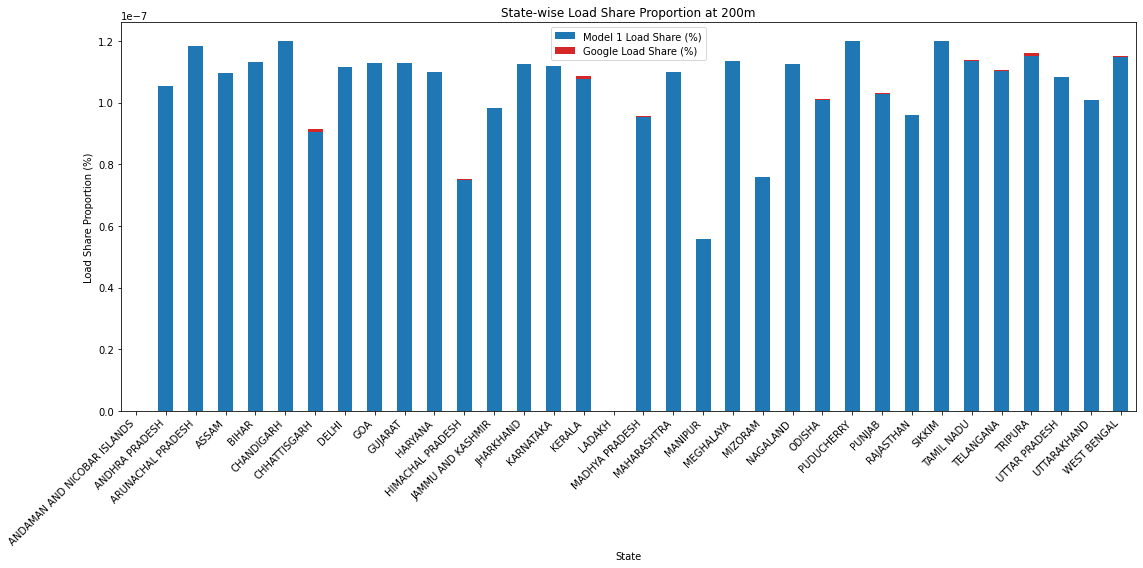

Metric: 500m
Model 1 Total Load Share: 0.9050028047752863
Google MMI Total Load Share: 0.0027363044629889473
State-wise Load Share Proportion:
                             Model 1 Load Share (%)  Google Load Share (%)
State                                                                     
ANDAMAN AND NICOBAR ISLANDS            0.000000e+00           0.000000e+00
ANDHRA PRADESH                         1.050785e-07           3.073759e-10
ARUNACHAL PRADESH                      1.182564e-07           0.000000e+00
ASSAM                                  1.093360e-07           2.897613e-10
BIHAR                                  1.130483e-07           1.438669e-10
CHANDIGARH                             1.197557e-07           2.148876e-10
CHHATTISGARH                           9.035976e-08           1.003758e-09
DELHI                                  1.115418e-07           3.959107e-12
GOA                                    1.127382e-07           0.000000e+00
GUJARAT                         

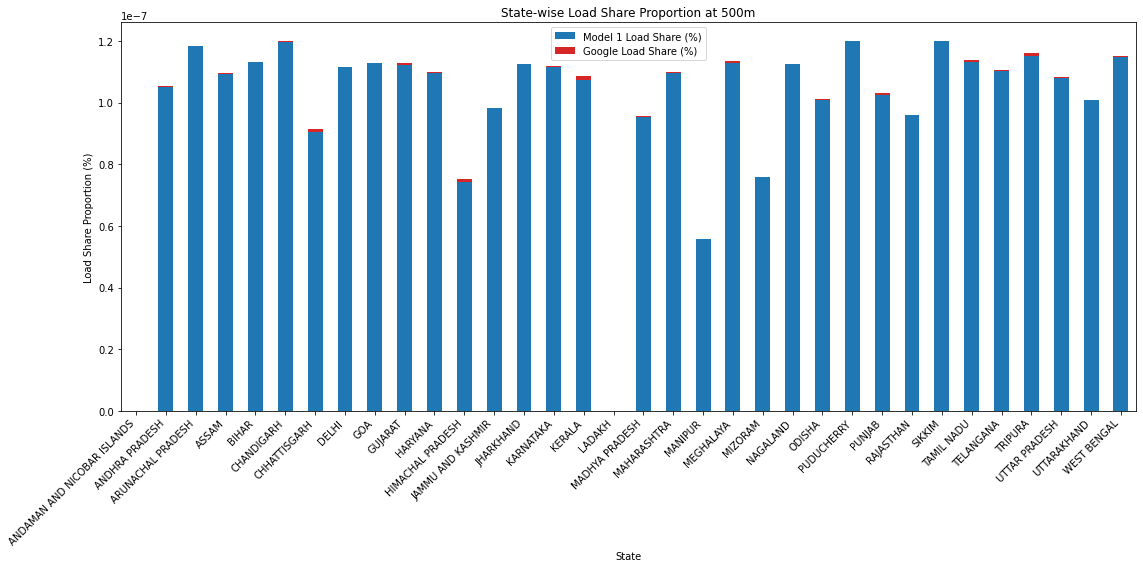

Metric: 1000m
Model 1 Total Load Share: 0.9022014220085787
Google MMI Total Load Share: 0.005537687229697783
State-wise Load Share Proportion:
                             Model 1 Load Share (%)  Google Load Share (%)
State                                                                     
ANDAMAN AND NICOBAR ISLANDS            0.000000e+00           0.000000e+00
ANDHRA PRADESH                         1.046004e-07           7.854440e-10
ARUNACHAL PRADESH                      1.182564e-07           0.000000e+00
ASSAM                                  1.094064e-07           2.193065e-10
BIHAR                                  1.130185e-07           1.736645e-10
CHANDIGARH                             1.193638e-07           6.067716e-10
CHHATTISGARH                           9.018777e-08           1.175750e-09
DELHI                                  1.115418e-07           4.002234e-12
GOA                                    1.126046e-07           1.336183e-10
GUJARAT                         

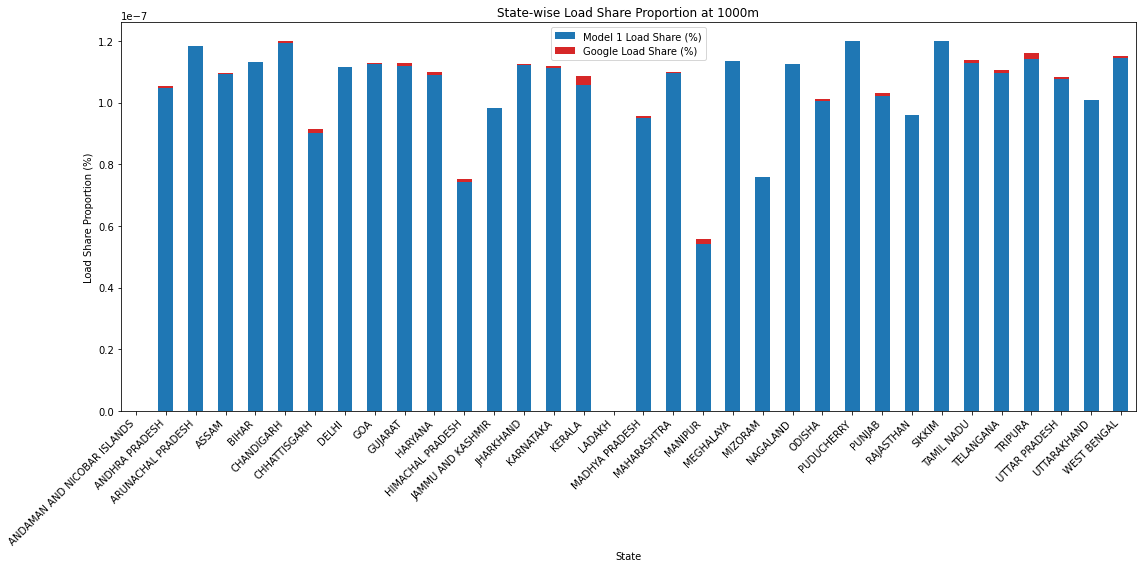

Metric: 2000m
Model 1 Total Load Share: 0.8948064758333997
Google MMI Total Load Share: 0.012932633404876444
State-wise Load Share Proportion:
                             Model 1 Load Share (%)  Google Load Share (%)
State                                                                     
ANDAMAN AND NICOBAR ISLANDS            0.000000e+00           0.000000e+00
ANDHRA PRADESH                         1.039044e-07           1.481469e-09
ARUNACHAL PRADESH                      1.182564e-07           0.000000e+00
ASSAM                                  1.078849e-07           1.740804e-09
BIHAR                                  1.127287e-07           4.635071e-10
CHANDIGARH                             1.193333e-07           6.373414e-10
CHHATTISGARH                           8.966444e-08           1.699082e-09
DELHI                                  1.115040e-07           4.179057e-11
GOA                                    1.124309e-07           3.072731e-10
GUJARAT                         

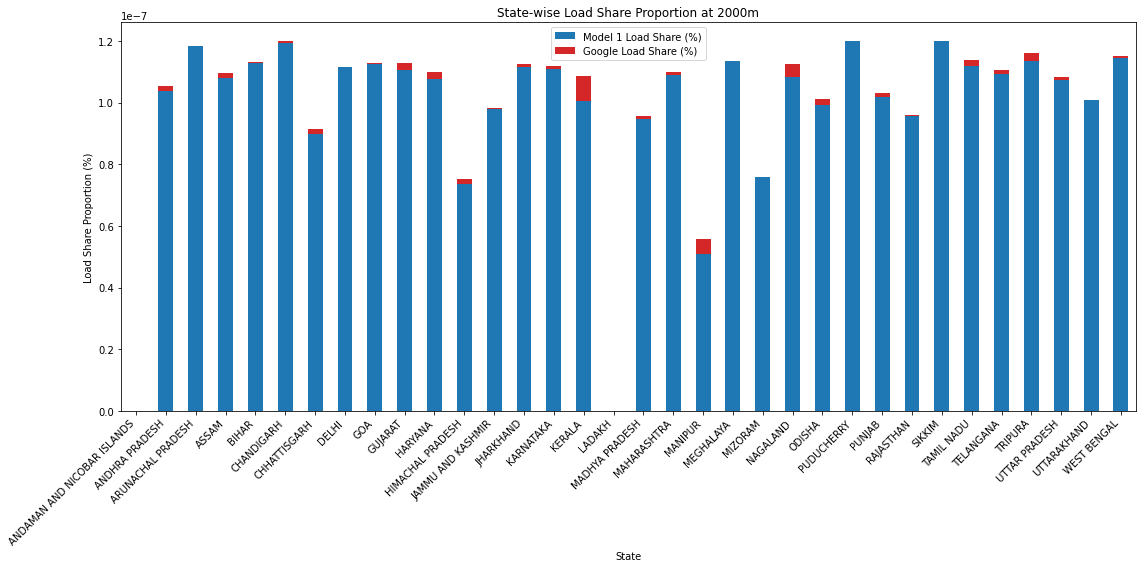

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pincode_dh_mapping dataframe
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

# Ensure Pincode columns are strings
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

# Add absolute load share (order counts) to df_mapping
order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)

# Calculate total load share for each state
state_total_load_share = df_mapping.groupby('State')['Order_Count'].sum()
print("Total Load Share for Each State:")
print(state_total_load_share)

# Identify the common pincodes and calculate load share for common pincodes
common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)
state_common_load_share = df_mapping[df_mapping['Is_Common']].groupby('State')['Order_Count'].sum()
print("Load Share for Common Pincodes for Each State:")
print(state_common_load_share)

# Add Proportional Load Share to df_mapping
total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_model_1_pincodes.append(pin_int)
        else:
            better_google_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    model_1_total_load_share, model_1_state_load_share = calculate_load_share(better_model_1_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    google_total_load_share, google_state_load_share = calculate_load_share(better_google_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'model_1_total_load_share': model_1_total_load_share,
        'model_1_state_load_share': model_1_state_load_share,
        'google_total_load_share': google_total_load_share,
        'google_state_load_share': google_state_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"Model 1 Total Load Share: {results[metric]['model_1_total_load_share']}")
    print(f"Google MMI Total Load Share: {results[metric]['google_total_load_share']}")
    print("State-wise Load Share Proportion:")
    state_model_1_load_share = results[metric]['model_1_state_load_share']
    state_google_load_share = results[metric]['google_state_load_share']
    
    state_load_share_proportion = pd.DataFrame({
        'Model 1 Load Share (%)': (state_model_1_load_share / state_total_load_share * 100).fillna(0),
        'Google Load Share (%)': (state_google_load_share / state_total_load_share * 100).fillna(0)
    })
    
    print(state_load_share_proportion)
    print()

    # Plot the state-wise load share proportion
    state_load_share_proportion.plot(kind='bar', stacked=True, figsize=(16, 8), color=['tab:blue', 'tab:red'])
    plt.xlabel('State')
    plt.ylabel('Load Share Proportion (%)')
    plt.title(f'State-wise Load Share Proportion at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Metric: 100m
GRID Total load share: (0.9063926375742556, 99.85166754959478, 755300459.9999996)
Google Total Load Share: (0.001346471664019728, 0.14833245040522855, 1122019.9999999993)
0.9077391092382753 756422479.9999996
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.963630               0.036370
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.849841               0.150159
BIHAR                        99.968626               0.031374
CHANDIGARH                   99.944220               0.055780
CHHATTISGARH                 99.051613               0.948387
DELHI                        99.983823               0.016177
GOA                           0.000000               0.000000
GUJARAT                      99.886087               0.113913
HARYANA                      99.943483               0.056517
H

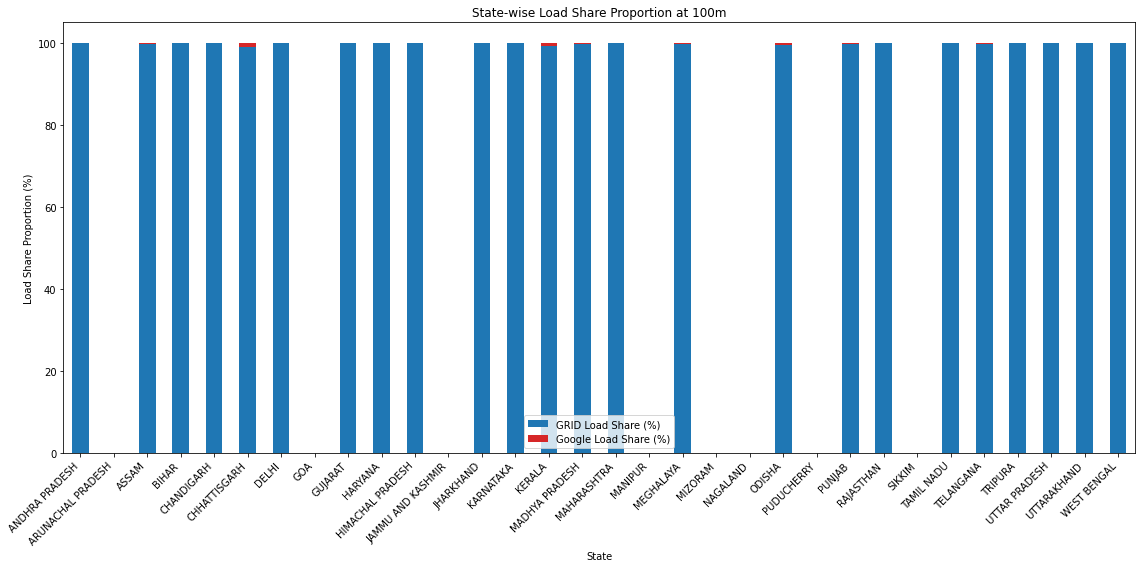

Metric: 200m
GRID Total load share: (0.906357254321717, 99.84776959563656, 755270974.9999999)
Google Total Load Share: (0.001381854916558561, 0.15223040436344507, 1151504.999999999)
0.9077391092382755 756422479.9999999
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.935885               0.064115
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.834633               0.165367
BIHAR                        99.922645               0.077355
CHANDIGARH                   99.921630               0.078370
CHHATTISGARH                 99.136935               0.863065
DELHI                        99.996451               0.003549
GOA                           0.000000               0.000000
GUJARAT                      99.853509               0.146491
HARYANA                      99.965970               0.034030
HIM

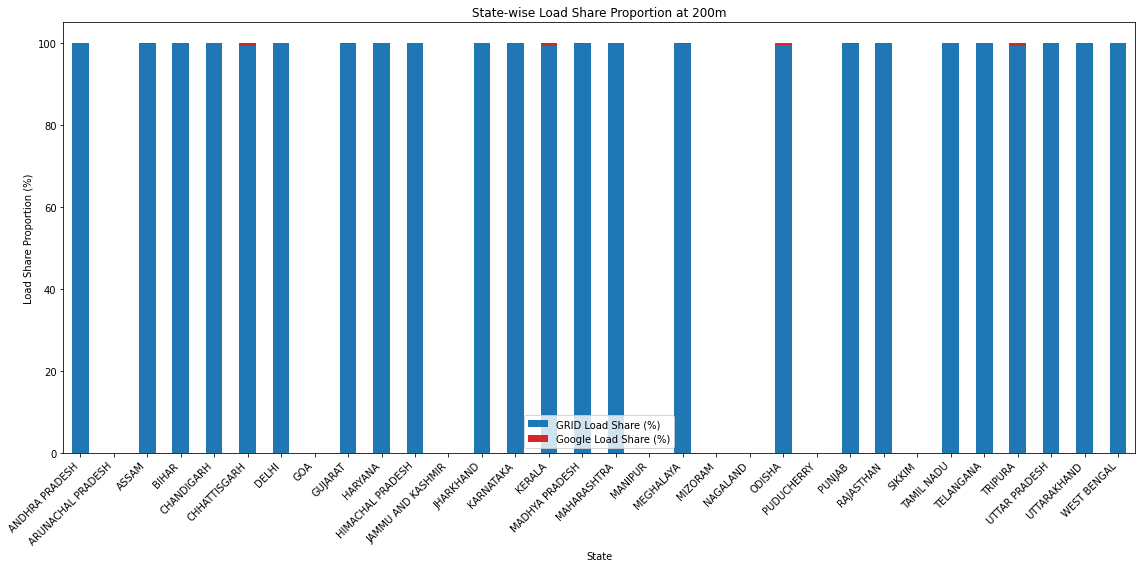

Metric: 500m
GRID Total load share: (0.9050028047752863, 99.69855827129834, 754142306.9999995)
Google Total Load Share: (0.0027363044629889473, 0.3014417287016645, 2280173.000000001)
0.9077391092382752 756422479.9999995
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.708333               0.291667
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.735681               0.264319
BIHAR                        99.872900               0.127100
CHANDIGARH                   99.820883               0.179117
CHHATTISGARH                 98.901358               1.098642
DELHI                        99.996451               0.003549
GOA                           0.000000               0.000000
GUJARAT                      99.497759               0.502241
HARYANA                      99.678013               0.321987
HI

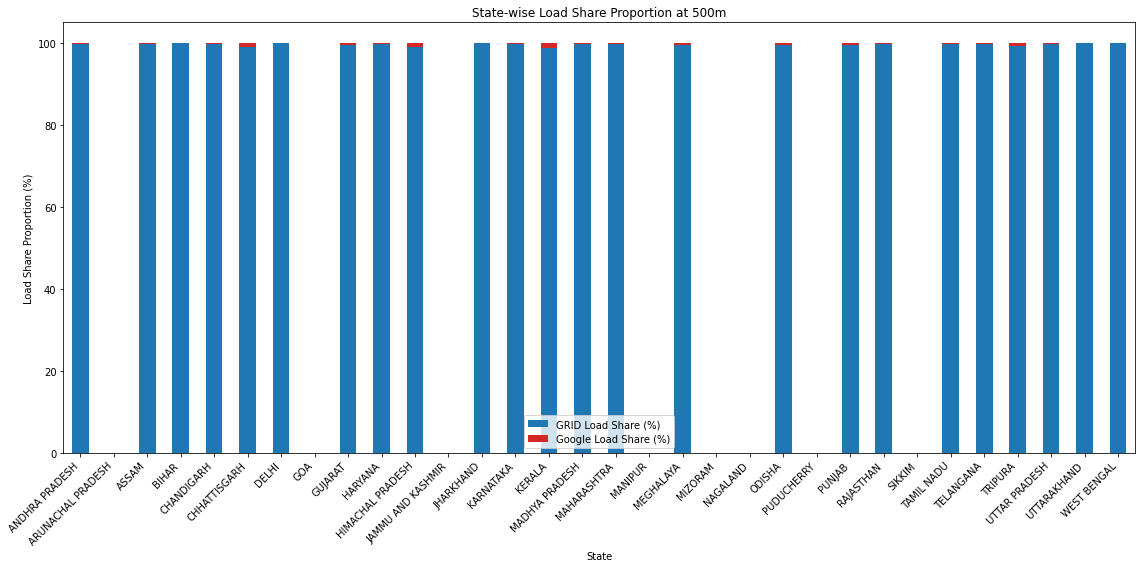

Metric: 1000m
GRID Total load share: (0.9022014220085787, 99.38994726862163, 751807904.0000006)
Google Total Load Share: (0.005537687229697783, 0.610052731378369, 4614576.000000001)
0.9077391092382765 756422480.0000006
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.254697               0.745303
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.799950               0.200050
BIHAR                        99.846576               0.153424
CHANDIGARH                   99.494233               0.505767
CHHATTISGARH                 98.713108               1.286892
DELHI                        99.996412               0.003588
GOA                          99.881479               0.118521
GUJARAT                      98.985337               1.014663
HARYANA                      99.145209               0.854791
HIM

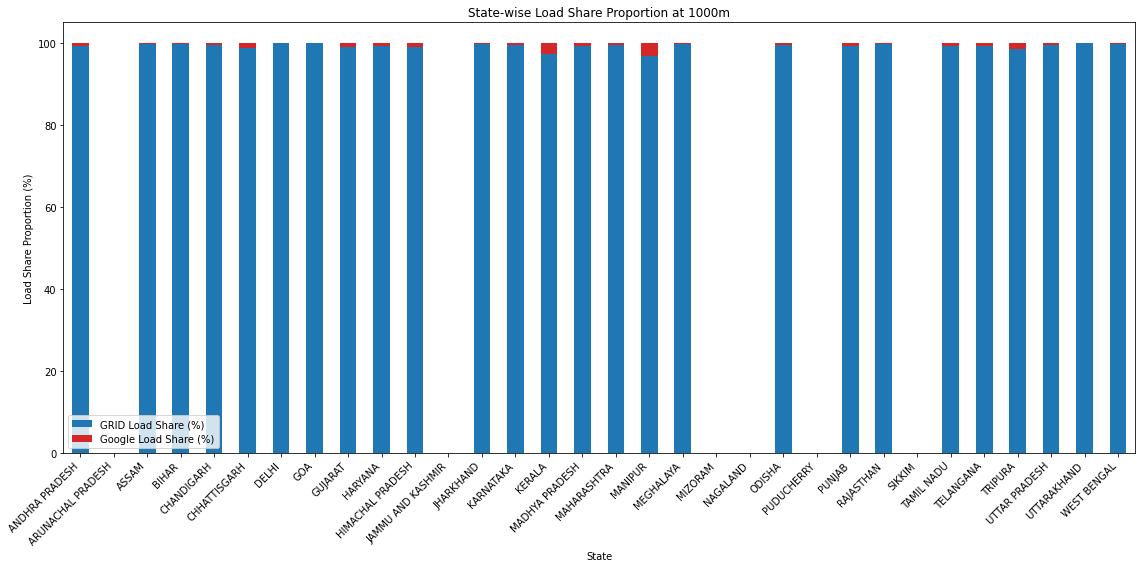

Metric: 2000m
GRID Total load share: (0.8948064758333997, 98.5752918131148, 745645667.0000002)
Google Total Load Share: (0.012932633404876444, 1.4247081868851927, 10776813.000000015)
0.9077391092382762 756422480.0000002
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               98.594243               1.405757
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        98.412048               1.587952
BIHAR                        99.590513               0.409487
CHANDIGARH                   99.468752               0.531248
CHHATTISGARH                 98.140306               1.859694
DELHI                        99.962535               0.037465
GOA                          99.727445               0.272555
GUJARAT                      97.953427               2.046573
HARYANA                      97.970090               2.029910
HI

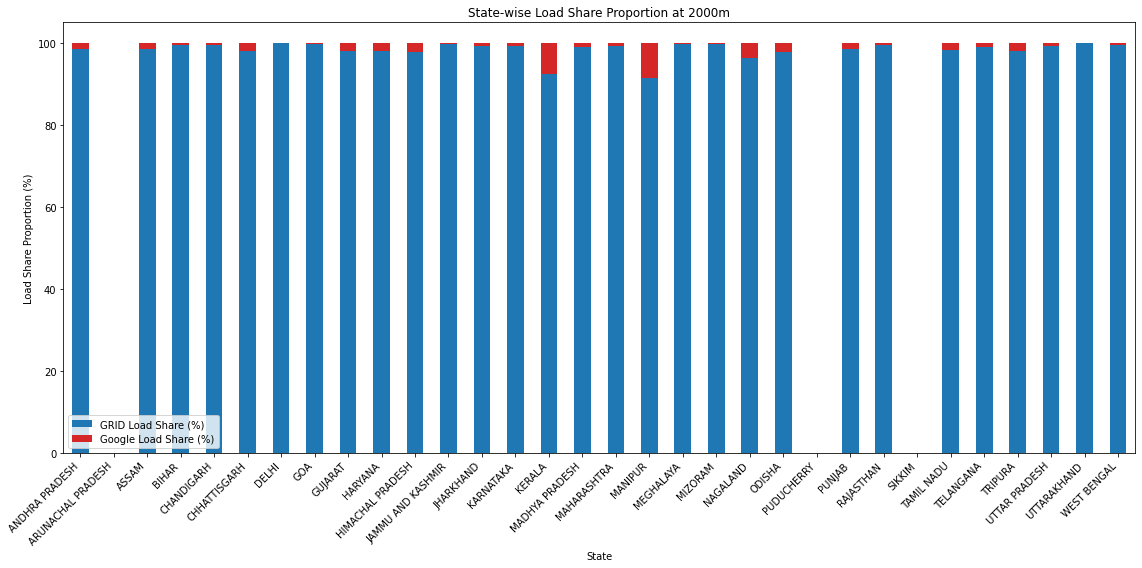

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_model_1_pincodes.append(pin_int)
        else:
            better_google_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    model_1_total_load_share, model_1_state_load_share = calculate_load_share(better_model_1_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    google_total_load_share, google_state_load_share = calculate_load_share(better_google_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'model_1_total_load_share': model_1_total_load_share,
        'model_1_state_load_share': model_1_state_load_share,
        'google_total_load_share': google_total_load_share,
        'google_state_load_share': google_state_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"GRID Total load share: {results[metric]['model_1_total_load_share'],results[metric]['model_1_total_load_share']/(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'])*100,results[metric]['model_1_total_load_share']*total_orders}")
    print(f"Google Total Load Share: {results[metric]['google_total_load_share'],results[metric]['google_total_load_share']/(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'])*100,results[metric]['google_total_load_share']*total_orders}")
    print(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'],results[metric]['model_1_total_load_share']*total_orders+results[metric]['google_total_load_share']*total_orders)
    print("State-wise Load Share Proportion:")
    state_model_1_load_share = results[metric]['model_1_state_load_share']
    state_google_load_share = results[metric]['google_state_load_share']
    
    state_load_share_proportion = pd.DataFrame({
        'GRID Load Share (%)': (state_model_1_load_share / (state_model_1_load_share + state_google_load_share) * 100).fillna(0),
        'Google Load Share (%)': (state_google_load_share / (state_model_1_load_share + state_google_load_share) * 100).fillna(0)
    })
    
    print(state_load_share_proportion)
    print()

    state_load_share_proportion.plot(kind='bar', stacked=True, figsize=(16, 8), color=['tab:blue', 'tab:red'])
    plt.xlabel('State')
    plt.ylabel('Load Share Proportion (%)')
    plt.title(f'State-wise Load Share Proportion at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [5]:
file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path , usecols =['cleaned_address','pincode','state'])

In [8]:
test_data.head()

state   pincode  \
0    Andaman & Nicobar Islands  744103.0   
1    Andaman & Nicobar Islands  744103.0   
2  Andaman and Nicobar Islands  744103.0   
3    Andaman & Nicobar Islands  744103.0   
4    Andaman & Nicobar Islands  744103.0   

                                     cleaned_address  
0   01 janki niwas near polytechnic college lokna...  
1   123 austinabad temple road opposite armugam c...  
2       133 1 abdul majeed manzil mg road junglighat  
3   16 dtdc main branch junglighat dean street ii...  
4   181 mg road 181 mg road near poineer chicken ...

In [6]:
test_data.columns

Index(['state', 'pincode', 'cleaned_address'], dtype='object')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path, usecols=['pincode'])
test_data['pincode'] = test_data['pincode'].astype('Int64').astype(str)
test_data.head()

pincode
0  744103
1  744103
2  744103
3  744103
4  744103

In [80]:
len(test_data)

11176756

In [75]:
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)


In [82]:
print("Mapping Data Sample:")
print(df_mapping.head())


Mapping Data Sample:
   Sl No Pincode             HubName       PARTNERCENTRE     Code  State  \
0      1  110001    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
1      2  110002    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
2      3  110003    DaryaganjHub_DEL    DaryaganjHub_DEL  DEL/DYJ  DELHI   
3      4  110004    PaharganjHub_DEL    PaharganjHub_DEL  DEL/PHG  DELHI   
4      5  110005  JhandewalanHub_DEL  JhandewalanHub_DEL  DEL/JWN  DELHI   

    Zone Type       Status        RCA  ...   Mapping COD Current Status  \
0  NORTH   DH  Serviceable  All Clear  ...  786151.0               True   
1  NORTH   DH  Serviceable  All Clear  ...  786153.0               True   
2  NORTH   DH  Serviceable  All Clear  ...  786156.0               True   
3  NORTH   DH  Serviceable  All Clear  ...  786159.0               True   
4  NORTH   DH  Serviceable  All Clear  ...  786190.0               True   

  COD RCA  COD Switch Off date COD restoration date              Myntra

In [83]:
merged_data = test_data.merge(df_mapping, left_on='pincode', right_on='Pincode', how='right')

In [84]:
merged_data.head()

pincode  Sl No Pincode           HubName     PARTNERCENTRE     Code  State  \
0  110001      1  110001  PaharganjHub_DEL  PaharganjHub_DEL  DEL/PHG  DELHI   
1  110001      1  110001  PaharganjHub_DEL  PaharganjHub_DEL  DEL/PHG  DELHI   
2  110001      1  110001  PaharganjHub_DEL  PaharganjHub_DEL  DEL/PHG  DELHI   
3  110001      1  110001  PaharganjHub_DEL  PaharganjHub_DEL  DEL/PHG  DELHI   
4  110001      1  110001  PaharganjHub_DEL  PaharganjHub_DEL  DEL/PHG  DELHI   

    Zone Type       Status  ...   Mapping COD Current Status COD RCA  \
0  NORTH   DH  Serviceable  ...  786151.0               True     NaN   
1  NORTH   DH  Serviceable  ...  786151.0               True     NaN   
2  NORTH   DH  Serviceable  ...  786151.0               True     NaN   
3  NORTH   DH  Serviceable  ...  786151.0               True     NaN   
4  NORTH   DH  Serviceable  ...  786151.0               True     NaN   

  COD Switch Off date  COD restoration date            Myntra  \
0                 NaN                   NaN  PAHARGANJHUB_DEL   
1                 NaN                   NaN  PAHARGANJHUB_DEL   
2                 NaN                   NaN  PAHARGANJHUB_DEL   
3                 NaN                   NaN  PAHARGANJHUB_DEL   
4                 NaN                   NaN  PAHARGANJHUB_DEL   

           check 1 Aging Embargo Aging COD  Aging Embargo Bucket  
0  Independent_EKL           0.0       0.0                 FALSE  
1  Independent_EKL           0.0       0.0                 FALSE  
2  Independent_EKL           0.0       0.0                 FALSE  
3  Independent_EKL           0.0       0.0                 FALSE  
4  Independent_EKL           0.0       0.0                 FALSE  

[5 rows x 33 columns]

In [85]:
len(merged_data)

11178555

In [86]:
11178555 - 11176756

1799

In [88]:
print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))

Merged Data Sample with NaN values:
13800


In [89]:
unmatched_pincodes = merged_data[merged_data['State'].isna()]['pincode'].unique()
print("Unmatched Pincodes:")
print(unmatched_pincodes)

Unmatched Pincodes:
['131028' '131029' '190005' '190014' '190015' '190019' '190021' '191101'
 '192101' '193201' nan '250623' '508201' '508218' '670676' '670679'
 '670692' '670693' '670694' '744101' '744102' '744103' '744112' '823002'
 '823003' '824209' '422113' '364140' '364230' '364250' '364275' '364505'
 '380055' '394150' '394180' '394185' '394305' '394310' '394325' '394326'
 '394327' '421601' '421604' '422103' '422112' '505101' '505122' '505476'
 '505490' '531149' '250606']


In [90]:
matched_data = merged_data.dropna(subset=['State'])

In [91]:
common_pincode_set = set(common_pincode_list)
matched_data['Is_Common'] = matched_data['Pincode'].apply(lambda x: x in common_pincode_set)

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
state_distribution_full = matched_data['State'].value_counts()
print("State-wise Distribution for Full Test Data:")
print(state_distribution_full)


State-wise Distribution for Full Test Data:
WEST BENGAL                    1283753
KARNATAKA                      1097712
UTTAR PRADESH                  1029787
MAHARASHTRA                    1004363
TAMIL NADU                      825070
KERALA                          689393
BIHAR                           614329
DELHI                           557111
TELANGANA                       513217
ANDHRA PRADESH                  506781
ODISHA                          471766
GUJARAT                         381357
ASSAM                           351526
HARYANA                         313913
JHARKHAND                       262614
MADHYA PRADESH                  256353
RAJASTHAN                       242676
PUNJAB                          204924
GOA                             113656
UTTARAKHAND                     111578
CHHATTISGARH                     85931
HIMACHAL PRADESH                 48172
TRIPURA                          42552
MEGHALAYA                        29745
JAMMU AND KASHMIR   

In [93]:

state_distribution_common = matched_data[matched_data['Is_Common']]['State'].value_counts()
print("State-wise Distribution for Common Pincodes:")
print(state_distribution_common)

df_counts = pd.DataFrame({
    'Total_Pincodes': state_distribution_full,
    'Common_Pincodes': state_distribution_common
}).fillna(0)



State-wise Distribution for Common Pincodes:
WEST BENGAL          1240557
KARNATAKA            1054646
MAHARASHTRA           957864
UTTAR PRADESH         950518
TAMIL NADU            793898
KERALA                634971
BIHAR                 588395
DELHI                 557065
TELANGANA             491292
ANDHRA PRADESH        465667
ODISHA                416115
GUJARAT               368643
ASSAM                 327488
HARYANA               292048
JHARKHAND             252224
MADHYA PRADESH        221460
RAJASTHAN             204438
PUNJAB                184102
GOA                   107121
UTTARAKHAND            97420
CHHATTISGARH           75417
TRIPURA                41412
HIMACHAL PRADESH       33758
MEGHALAYA              29368
JAMMU AND KASHMIR      26338
ARUNACHAL PRADESH      19889
PUDUCHERRY             16510
SIKKIM                 16231
CHANDIGARH             13241
MIZORAM                10447
NAGALAND                9327
MANIPUR                 3590
Name: State, dtype: int64


/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


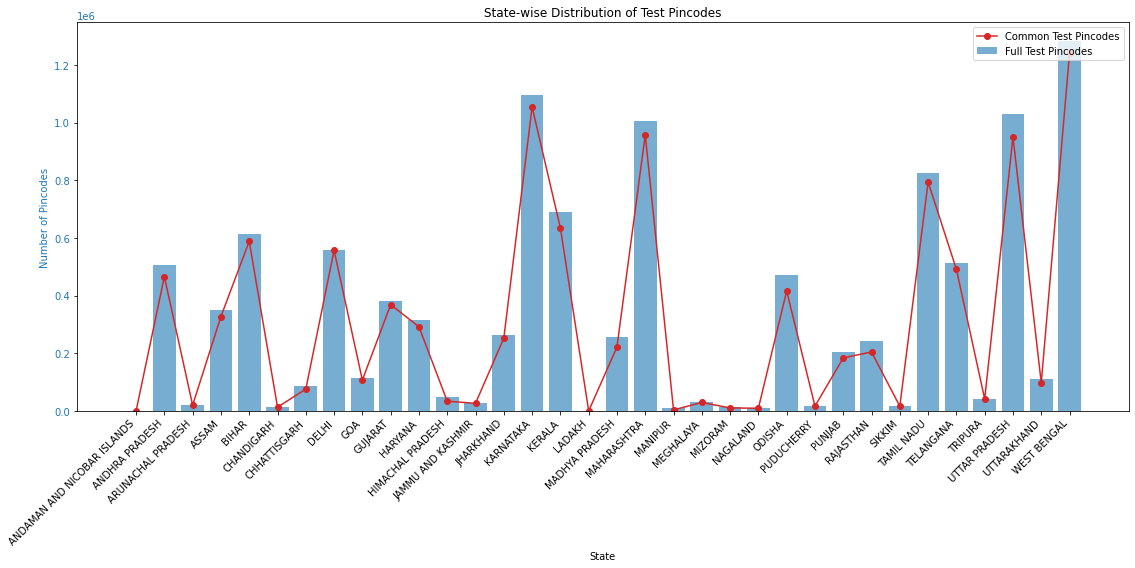

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


State-wise Load Share for Full Test Data:
State
ANDAMAN AND NICOBAR ISLANDS      0.000000
ANDHRA PRADESH                 103.893908
ARUNACHAL PRADESH                6.133507
ASSAM                           70.922739
BIHAR                          278.047430
CHANDIGARH                       1.247649
CHHATTISGARH                    30.244351
DELHI                          424.672463
GOA                             15.773094
GUJARAT                         99.178233
HARYANA                        192.411670
HIMACHAL PRADESH                 6.851466
JAMMU AND KASHMIR                2.988784
JHARKHAND                       82.163995
KARNATAKA                      640.230845
KERALA                          55.224449
LADAKH                           0.000000
MADHYA PRADESH                  72.018938
MAHARASHTRA                    323.970404
MANIPUR                          2.097399
MEGHALAYA                        6.175550
MIZORAM                          1.402018
NAGALAND                    

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


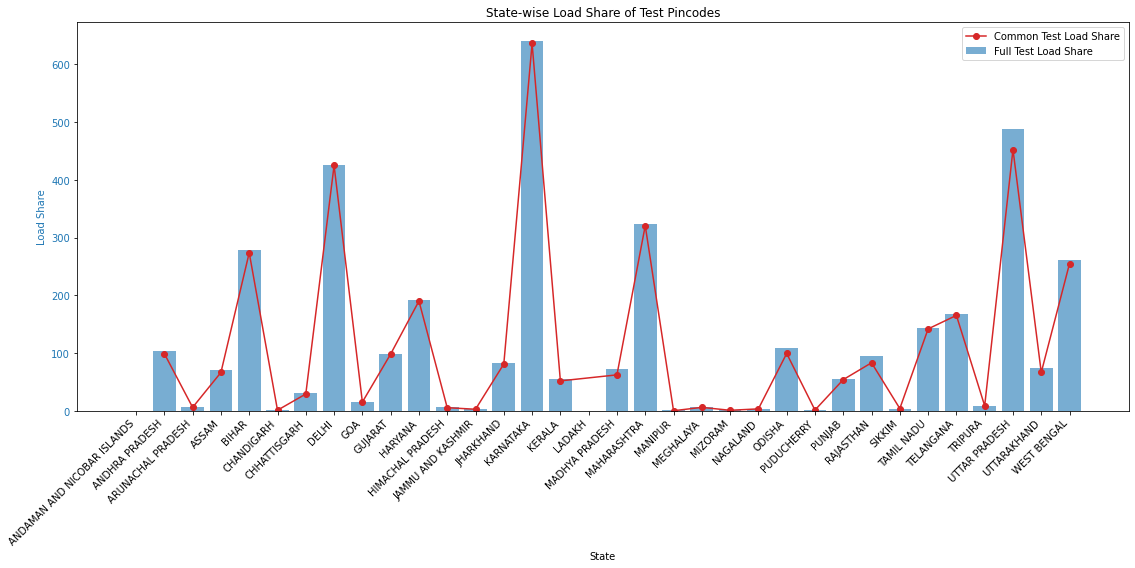

In [94]:
fig, ax1 = plt.subplots(figsize=(16, 8))
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Pincodes', color=color)
ax1.bar(df_counts.index, df_counts['Total_Pincodes'], color=color, alpha=0.6, label='Full Test Pincodes')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_counts.index, rotation=45, ha='right')
ax1.plot(df_counts.index, df_counts['Common_Pincodes'], color='tab:red', marker='o', label='Common Test Pincodes')
ax1.legend(loc='upper right')
ax1.set_title('State-wise Distribution of Test Pincodes')
fig.tight_layout()
plt.show()

# Calculate load share for full and common pincodes
total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
matched_data['Proportional_Load_Share'] = matched_data['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

load_share_full = matched_data.groupby('State')['Proportional_Load_Share'].sum()
print("State-wise Load Share for Full Test Data:")
print(load_share_full)

load_share_common = matched_data[matched_data['Is_Common']].groupby('State')['Proportional_Load_Share'].sum()
print("State-wise Load Share for Common Test Pincodes:")
print(load_share_common)

# Plot the state-wise load share
fig, ax1 = plt.subplots(figsize=(16, 8))
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Load Share', color=color)
ax1.bar(load_share_full.index, load_share_full, color=color, alpha=0.6, label='Full Test Load Share')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(load_share_full.index, rotation=45, ha='right')
ax1.plot(load_share_common.index, load_share_common, color='tab:red', marker='o', label='Common Test Load Share')
ax1.legend(loc='upper right')
ax1.set_title('State-wise Load Share of Test Pincodes')
fig.tight_layout()
plt.show()


State-wise Distribution for Full Test Data:
WEST BENGAL                    1283753
KARNATAKA                      1097712
UTTAR PRADESH                  1029787
MAHARASHTRA                    1004363
TAMIL NADU                      825070
KERALA                          689393
BIHAR                           614329
DELHI                           557111
TELANGANA                       513217
ANDHRA PRADESH                  506781
ODISHA                          471766
GUJARAT                         381357
ASSAM                           351526
HARYANA                         313913
JHARKHAND                       262614
MADHYA PRADESH                  256353
RAJASTHAN                       242676
PUNJAB                          204924
GOA                             113656
UTTARAKHAND                     111578
CHHATTISGARH                     85931
HIMACHAL PRADESH                 48172
TRIPURA                          42552
MEGHALAYA                        29745
JAMMU AND KASHMIR   

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


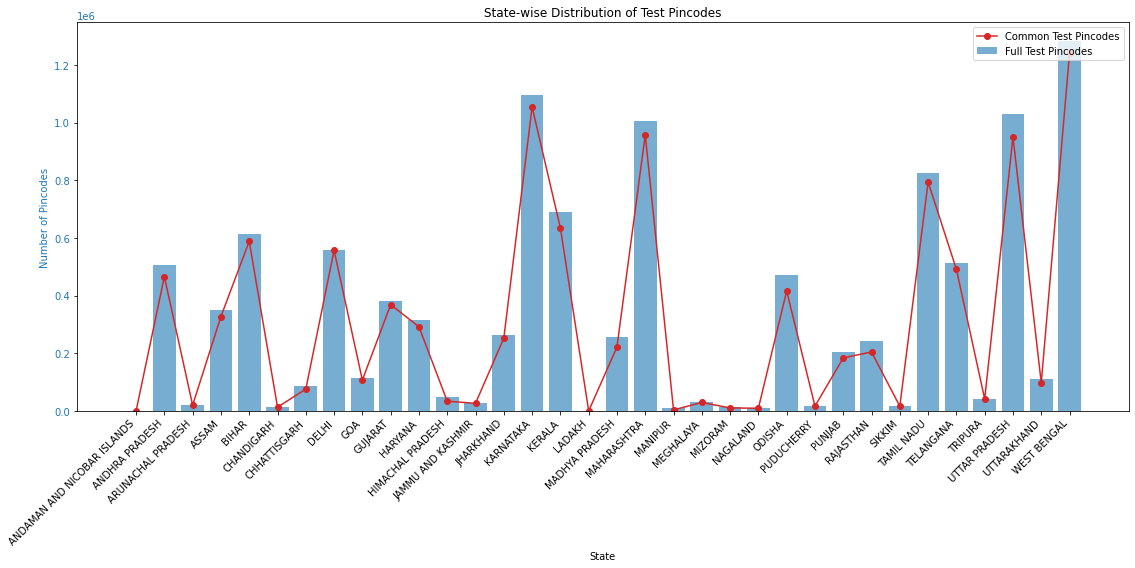

State-wise Load Share for Full Test Data:
State
ANDAMAN AND NICOBAR ISLANDS      0.000000
ANDHRA PRADESH                 103.893908
ARUNACHAL PRADESH                6.133507
ASSAM                           70.922739
BIHAR                          278.047430
CHANDIGARH                       1.247649
CHHATTISGARH                    30.244351
DELHI                          424.672463
GOA                             15.773094
GUJARAT                         99.178233
HARYANA                        192.411670
HIMACHAL PRADESH                 6.851466
JAMMU AND KASHMIR                2.988784
JHARKHAND                       82.163995
KARNATAKA                      640.230845
KERALA                          55.224449
LADAKH                           0.000000
MADHYA PRADESH                  72.018938
MAHARASHTRA                    323.970404
MANIPUR                          2.097399
MEGHALAYA                        6.175550
MIZORAM                          1.402018
NAGALAND                    

/home/uddeshya.singh/miniconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator


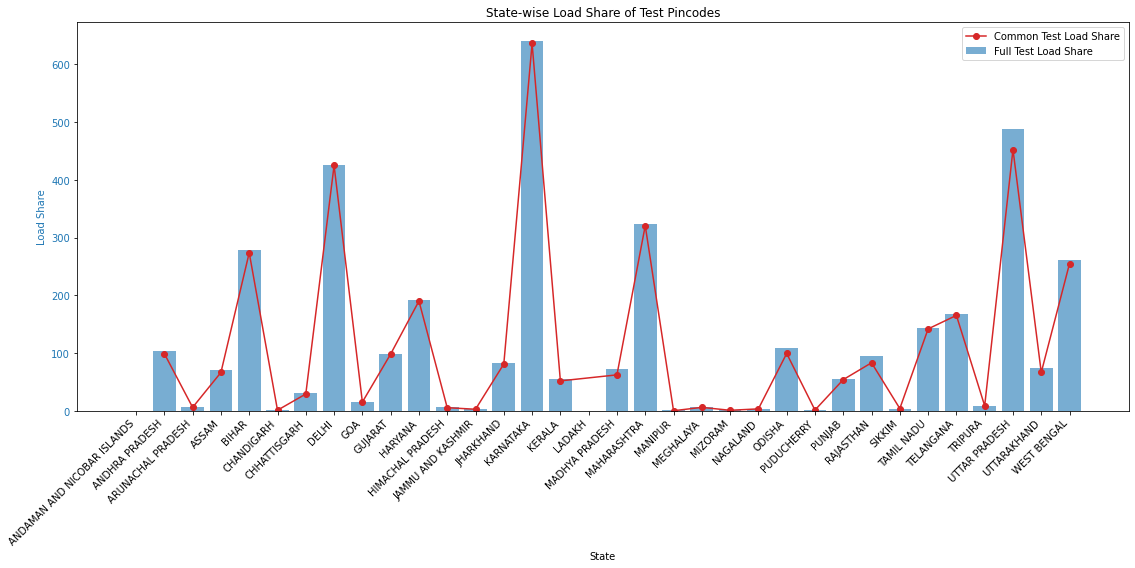

Total number of pincodes: 11178555
Number of common pincodes: 10501460


In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)
file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path, usecols=['pincode'])
test_data['pincode'] = test_data['pincode'].astype('Int64').astype(str)

# Merge the test data with the mapping data
matched_data = test_data.merge(df_mapping, left_on='pincode', right_on='Pincode', how='right')

# Calculate state-wise distribution for full test data
state_distribution_full = matched_data['State'].value_counts()
print("State-wise Distribution for Full Test Data:")
print(state_distribution_full)

# Calculate state-wise distribution for common pincodes
common_pincode_set = set(common_pincode_list)
matched_data['Is_Common'] = matched_data['Pincode'].apply(lambda x: x in common_pincode_set)
state_distribution_common = matched_data[matched_data['Is_Common']]['State'].value_counts()
print("State-wise Distribution for Common Test Pincodes:")
print(state_distribution_common)

# Create a DataFrame for plotting
df_counts = pd.DataFrame({
    'Total_Pincodes': state_distribution_full,
    'Common_Pincodes': state_distribution_common
}).fillna(0)

# Plot the state-wise distribution of test pincodes
fig, ax1 = plt.subplots(figsize=(16, 8))
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Pincodes', color=color)
ax1.bar(df_counts.index, df_counts['Total_Pincodes'], color=color, alpha=0.6, label='Full Test Pincodes')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_counts.index, rotation=45, ha='right')
ax1.plot(df_counts.index, df_counts['Common_Pincodes'], color='tab:red', marker='o', label='Common Test Pincodes')
ax1.legend(loc='upper right')
ax1.set_title('State-wise Distribution of Test Pincodes')
fig.tight_layout()
plt.show()

# Calculate load share for full and common pincodes
total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
matched_data['Proportional_Load_Share'] = matched_data['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

load_share_full = matched_data.groupby('State')['Proportional_Load_Share'].sum()
print("State-wise Load Share for Full Test Data:")
print(load_share_full)

load_share_common = matched_data[matched_data['Is_Common']].groupby('State')['Proportional_Load_Share'].sum()
print("State-wise Load Share for Common Test Pincodes:")
print(load_share_common)

# Plot the state-wise load share
fig, ax1 = plt.subplots(figsize=(16, 8))
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Load Share', color=color)
ax1.bar(load_share_full.index, load_share_full, color=color, alpha=0.6, label='Full Test Load Share')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(load_share_full.index, rotation=45, ha='right')
ax1.plot(load_share_common.index, load_share_common, color='tab:red', marker='o', label='Common Test Load Share')
ax1.legend(loc='upper right')
ax1.set_title('State-wise Load Share of Test Pincodes')
fig.tight_layout()
plt.show()

# Print total number of pincodes and common pincodes
print(f"Total number of pincodes: {len(matched_data)}")
print(f"Number of common pincodes: {len(matched_data[matched_data['Is_Common']])}")


Metric: 100m
GRID Total load share: (0.9063926375742556, 99.85166754959478, 755300459.9999996)
Google Total Load Share: (0.001346471664019728, 0.14833245040522855, 1122019.9999999993)
0.9077391092382753 756422479.9999996
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.963630               0.036370
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.849841               0.150159
BIHAR                        99.968626               0.031374
CHANDIGARH                   99.944220               0.055780
CHHATTISGARH                 99.051613               0.948387
DELHI                        99.983823               0.016177
GOA                           0.000000               0.000000
GUJARAT                      99.886087               0.113913
HARYANA                      99.943483               0.056517
H

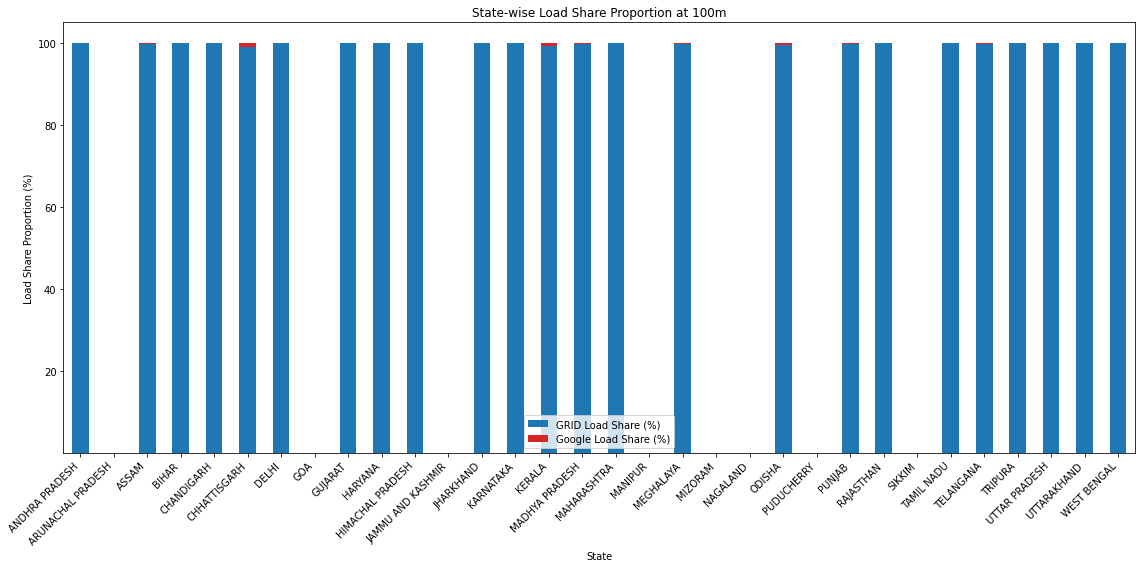

Metric: 200m
GRID Total load share: (0.906357254321717, 99.84776959563656, 755270974.9999999)
Google Total Load Share: (0.001381854916558561, 0.15223040436344507, 1151504.999999999)
0.9077391092382755 756422479.9999999
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.935885               0.064115
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.834633               0.165367
BIHAR                        99.922645               0.077355
CHANDIGARH                   99.921630               0.078370
CHHATTISGARH                 99.136935               0.863065
DELHI                        99.996451               0.003549
GOA                           0.000000               0.000000
GUJARAT                      99.853509               0.146491
HARYANA                      99.965970               0.034030
HIM

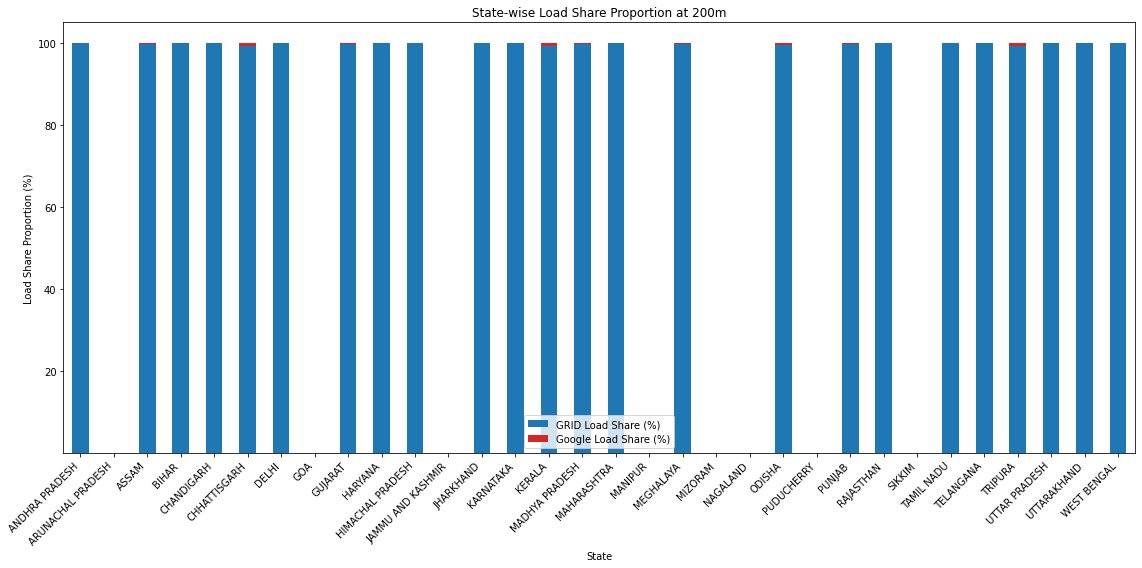

Metric: 500m
GRID Total load share: (0.9050028047752863, 99.69855827129834, 754142306.9999995)
Google Total Load Share: (0.0027363044629889473, 0.3014417287016645, 2280173.000000001)
0.9077391092382752 756422479.9999995
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.708333               0.291667
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.735681               0.264319
BIHAR                        99.872900               0.127100
CHANDIGARH                   99.820883               0.179117
CHHATTISGARH                 98.901358               1.098642
DELHI                        99.996451               0.003549
GOA                           0.000000               0.000000
GUJARAT                      99.497759               0.502241
HARYANA                      99.678013               0.321987
HI

Metric: 1000m
GRID Total load share: (0.9022014220085787, 99.38994726862163, 751807904.0000006)
Google Total Load Share: (0.005537687229697783, 0.610052731378369, 4614576.000000001)
0.9077391092382765 756422480.0000006
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               99.254697               0.745303
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        99.799950               0.200050
BIHAR                        99.846576               0.153424
CHANDIGARH                   99.494233               0.505767
CHHATTISGARH                 98.713108               1.286892
DELHI                        99.996412               0.003588
GOA                          99.881479               0.118521
GUJARAT                      98.985337               1.014663
HARYANA                      99.145209               0.854791
HIM

Metric: 2000m
GRID Total load share: (0.8948064758333997, 98.5752918131148, 745645667.0000002)
Google Total Load Share: (0.012932633404876444, 1.4247081868851927, 10776813.000000015)
0.9077391092382762 756422480.0000002
State-wise Load Share Proportion:
                   GRID Load Share (%)  Google Load Share (%)
State                                                        
ANDHRA PRADESH               98.594243               1.405757
ARUNACHAL PRADESH             0.000000               0.000000
ASSAM                        98.412048               1.587952
BIHAR                        99.590513               0.409487
CHANDIGARH                   99.468752               0.531248
CHHATTISGARH                 98.140306               1.859694
DELHI                        99.962535               0.037465
GOA                          99.727445               0.272555
GUJARAT                      97.953427               2.046573
HARYANA                      97.970090               2.029910
HI

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')

df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

order_counts_dict = {int(pin): orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Order_Count'] = df_mapping['Pincode'].astype(int).map(order_counts_dict).fillna(0)

common_pincode_set = set(common_pincode_list)
df_mapping['Is_Common'] = df_mapping['Pincode'].apply(lambda x: x in common_pincode_set)

total_orders = sum(order_wise_count_pincode_wise_dict.values())
proportional_weight_pincode_wise_dict = {int(pin): orders / total_orders for pin, orders in order_wise_count_pincode_wise_dict.items()}
df_mapping['Proportional_Load_Share'] = df_mapping['Pincode'].astype(int).map(proportional_weight_pincode_wise_dict).fillna(0)

def get_better_performing_pincodes(metric):
    better_model_1_pincodes = []
    better_google_pincodes = []
    for pin in common_pincode_list:
        pin_int = int(pin)  
        if pincode_wise_acc_dict_google[pin]['per'][metric] < updated_phase_I_II_pin_wise_acc_dict[pin]['per'][metric]:
            better_model_1_pincodes.append(pin_int)
        else:
            better_google_pincodes.append(pin_int)
    return better_model_1_pincodes, better_google_pincodes

def calculate_load_share(better_pincodes, proportional_weight_pincode_wise_dict, df_mapping):
    total_load_share = sum(proportional_weight_pincode_wise_dict[pin] for pin in better_pincodes if pin in proportional_weight_pincode_wise_dict)
    state_load_share = df_mapping[df_mapping['Pincode'].astype(int).isin(better_pincodes)].groupby('State')['Proportional_Load_Share'].sum()
    return total_load_share, state_load_share

metrics = [100, 200, 500, 1000, 2000]
results = {}

for metric in metrics:
    better_model_1_pincodes, better_google_pincodes = get_better_performing_pincodes(metric)
    model_1_total_load_share, model_1_state_load_share = calculate_load_share(better_model_1_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    google_total_load_share, google_state_load_share = calculate_load_share(better_google_pincodes, proportional_weight_pincode_wise_dict, df_mapping)
    results[metric] = {
        'model_1_total_load_share': model_1_total_load_share,
        'model_1_state_load_share': model_1_state_load_share,
        'google_total_load_share': google_total_load_share,
        'google_state_load_share': google_state_load_share
    }

for metric in metrics:
    print(f"Metric: {metric}m")
    print(f"GRID Total load share: {results[metric]['model_1_total_load_share'],results[metric]['model_1_total_load_share']/(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'])*100,results[metric]['model_1_total_load_share']*total_orders}")
    print(f"Google Total Load Share: {results[metric]['google_total_load_share'],results[metric]['google_total_load_share']/(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'])*100,results[metric]['google_total_load_share']*total_orders}")
    print(results[metric]['model_1_total_load_share']+results[metric]['google_total_load_share'],results[metric]['model_1_total_load_share']*total_orders+results[metric]['google_total_load_share']*total_orders)
    print("State-wise Load Share Proportion:")
    state_model_1_load_share = results[metric]['model_1_state_load_share']
    state_google_load_share = results[metric]['google_state_load_share']
    
    state_load_share_proportion = pd.DataFrame({
        'GRID Load Share (%)': (state_model_1_load_share / (state_model_1_load_share + state_google_load_share) * 100).fillna(0),
        'Google Load Share (%)': (state_google_load_share / (state_model_1_load_share + state_google_load_share) * 100).fillna(0)
    })
    
    print(state_load_share_proportion)
    print()

    # Ensure states with 100% dominance are also plotted
    state_load_share_proportion = state_load_share_proportion.applymap(lambda x: x if x > 0 else 0.0001)
    
    state_load_share_proportion.plot(kind='bar', stacked=True, figsize=(16, 8), color=['tab:blue', 'tab:red'])
    plt.xlabel('State')
    plt.ylabel('Load Share Proportion (%)')
    plt.title(f'State-wise Load Share Proportion at {metric}m')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [107]:
# Ensure that 'State' column is in uppercase for consistency
df_mapping['State'] = df_mapping['State'].str.upper()

# Get the better-performing pincodes for the 200m metric
better_model_1_pincodes_200m, better_google_pincodes_200m = get_better_performing_pincodes(500)

# Filter the mapping dataframe for Arunachal Pradesh
arunachal_pincode_df = df_mapping[df_mapping['State'] == 'ARUNACHAL PRADESH']

# Check how many better-performing pincodes for Model 1 at 200m are in Arunachal Pradesh
better_model_1_pincodes_arunachal_200m = [pin for pin in better_model_1_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]
better_google_pincodes_arunachal_200m = [pin for pin in better_google_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]

print(f"Number of better-performing Model 1 pincodes at 200m in Arunachal Pradesh: {len(better_model_1_pincodes_arunachal_200m)}")
print(f"Number of better-performing Google pincodes at 200m in Arunachal Pradesh: {len(better_google_pincodes_arunachal_200m)}")

# Print the actual pincodes
print("Better-performing GRID pincodes at 200m in Arunachal Pradesh:", better_model_1_pincodes_arunachal_200m)
print("Better-performing Google pincodes at 200m in Arunachal Pradesh:", better_google_pincodes_arunachal_200m)


Number of better-performing Model 1 pincodes at 200m in Arunachal Pradesh: 7
Number of better-performing Google pincodes at 200m in Arunachal Pradesh: 0
Better-performing GRID pincodes at 200m in Arunachal Pradesh: [791112, 791109, 791001, 791102, 791113, 791110, 791111]
Better-performing Google pincodes at 200m in Arunachal Pradesh: []


In [108]:
# Ensure that 'State' column is in uppercase for consistency
df_mapping['State'] = df_mapping['State'].str.upper()

# Get the better-performing pincodes for the 200m metric
better_model_1_pincodes_200m, better_google_pincodes_200m = get_better_performing_pincodes(500)

# Filter the mapping dataframe for Arunachal Pradesh
arunachal_pincode_df = df_mapping[df_mapping['State'] == 'PUDUCHERRY']

# Check how many better-performing pincodes for Model 1 at 200m are in Arunachal Pradesh
better_model_1_pincodes_arunachal_200m = [pin for pin in better_model_1_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]
better_google_pincodes_arunachal_200m = [pin for pin in better_google_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]

print(f"Number of better-performing GRID pincodes at 200m in PUDUCHERRY: {len(better_model_1_pincodes_arunachal_200m)}")
print(f"Number of better-performing Google pincodes at 200m in PUDUCHERRY: {len(better_google_pincodes_arunachal_200m)}")

# Print the actual pincodes
print("Better-performing Model 1 pincodes at 200m in PUDUCHERRY:", better_model_1_pincodes_arunachal_200m)
print("Better-performing Google pincodes at 200m in PUDUCHERRY:", better_google_pincodes_arunachal_200m)


Number of better-performing GRID pincodes at 200m in PUDUCHERRY: 22
Number of better-performing Google pincodes at 200m in PUDUCHERRY: 0
Better-performing Model 1 pincodes at 200m in PUDUCHERRY: [605110, 605006, 605010, 605005, 605009, 605014, 605011, 605013, 605001, 605004, 605104, 605101, 605003, 605008, 605102, 605002, 605007, 605502, 605111, 605107, 605012, 605106]
Better-performing Google pincodes at 200m in PUDUCHERRY: []


In [109]:
# Ensure that 'State' column is in uppercase for consistency
df_mapping['State'] = df_mapping['State'].str.upper()

# Get the better-performing pincodes for the 200m metric
better_model_1_pincodes_200m, better_google_pincodes_200m = get_better_performing_pincodes(500)

# Filter the mapping dataframe for  SIKKIM
arunachal_pincode_df = df_mapping[df_mapping['State'] == 'SIKKIM']

# Check how many better-performing pincodes for Model 1 at 200m are in  SIKKIM
better_model_1_pincodes_arunachal_200m = [pin for pin in better_model_1_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]
better_google_pincodes_arunachal_200m = [pin for pin in better_google_pincodes_200m if pin in arunachal_pincode_df['Pincode'].astype(int).values]

print(f"Number of better-performing GRID pincodes at 200m in  SIKKIM: {len(better_model_1_pincodes_arunachal_200m)}")
print(f"Number of better-performing Google pincodes at 200m in  SIKKIM: {len(better_google_pincodes_arunachal_200m)}")

# Print the actual pincodes
print("Better-performing Model 1 pincodes at 200m in  SIKKIM:", better_model_1_pincodes_arunachal_200m)
print("Better-performing Google pincodes at 200m in  SIKKIM:", better_google_pincodes_arunachal_200m)


Number of better-performing GRID pincodes at 200m in  SIKKIM: 8
Number of better-performing Google pincodes at 200m in  SIKKIM: 0
Better-performing Model 1 pincodes at 200m in  SIKKIM: [737101, 737121, 737136, 737103, 737126, 737102, 737132, 737135]
Better-performing Google pincodes at 200m in  SIKKIM: []
